In [189]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
  
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from io import open
from collections import Counter
from functools import partial
import unicodedata
import re
from torch.autograd import Variable
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
import random
import time
from datetime import datetime
import pickle as pkl
import string
import os
from os import listdir 
from ast import literal_eval
from nltk.tokenize import WordPunctTokenizer 


import numpy as np 
import pandas as pd 
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.autograd import Variable
import random
import math 





import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
import sacrebleu
import random
import time
from datetime import datetime
import pickle as pkl
import string
import os
from os import listdir 
from ast import literal_eval
from sklearn.metrics import confusion_matrix
import matplotlib.style
import matplotlib as mpl
from collections import OrderedDict
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
# !pip install sacrebleu

     |████████████████████████████████| 61kB 3.2MB/s 


In [0]:
SRC_LANG = 'en'
TARG_LANG = 'cz'

SRC_MAX_SENTENCE_LEN = 10
TARG_MAX_SENTENCE_LEN = 10
SRC_VOCAB_SIZE = 10000 
TARG_VOCAB_SIZE = 10000 # odia only has 6246 tokens. so will change this later

BATCH_SIZE = 64

## Data Preprocessing

### Split and save raw data into train.src.tok, train.targ.tok, val.src.tok, val.targ.tok, test.src.tok, test.targ.tok

In [0]:
#### Create full data for (English, Pashto): combining 4 files each (not needed if you have the dataset in your directory)

# en_ps_EN = ['bible.en-ps.clean.en', 'KDE4.en-ps.en', 'ted-wmt20.en-ps.en', 'Ubuntu.en-ps.en']
# en_ps_PS = ['bible.en-ps.clean.ps', 'KDE4.en-ps.ps', 'ted-wmt20.en-ps.ps', 'Ubuntu.en-ps.ps']
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/en.tok', 'w') as outfile:
#     for file_name in en_ps_EN:
#         with open("/content/drive/My Drive/ds1012/MT/data/en-ps/{}".format(file_name)) as infile:
#             outfile.write(infile.read())
#         outfile.write('\n')
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/ps.tok', 'w') as outfile:
#     for file_name in en_ps_PS:
#         with open("/content/drive/My Drive/ds1012/MT/data/en-ps/{}".format(file_name)) as infile:
#             outfile.write(infile.read())
#         outfile.write('\n')

In [0]:
#### Create train, dev, test for (English, Pashto)

# random.seed(1234)

# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/en.tok') as infile:
#     data = infile.readlines()
# train_idx = int(len(data)*0.7)
# dev_idx = int(len(data)*0.85)
# random.shuffle(data)
# train = data[:train_idx]
# dev = data[train_idx:dev_idx]
# test = data[dev_idx:]

# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/train.en.tok', 'w') as outfile:
#     outfile.write("".join(train))
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/dev.en.tok', 'w') as outfile:
#     outfile.write("".join(dev))
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/test.en.tok', 'w') as outfile:
#     outfile.write("".join(test))

# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/ps.tok') as infile:
#     data = infile.readlines()

# random.shuffle(data)
# train = data[:train_idx]
# dev = data[train_idx:dev_idx]
# test = data[dev_idx:]

# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/train.ps.tok', 'w') as outfile:
#     outfile.write("".join(train))
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/dev.ps.tok', 'w') as outfile:
#     outfile.write("".join(dev))
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/test.ps.tok', 'w') as outfile:
#     outfile.write("".join(test))

In [0]:
# show examples for ps
with open('/content/drive/My Drive/ds1012/MT/data/en-ps/train.ps.tok') as f:
    data = f.read().split('\n')
data[:10]
# Note: data are not clean where both en and ps has sentence like '%d:%02d:%02d'

['مخبره',
 'دا د اِسمٰعيل زامن وُو ، چې په دې ترتيب سره پېدا شوى وُو : نبايوت ، قيدار ، ادبيئل ، مِبسام ،',
 'د کډي د کتابتونونو لپاره په مختاړي کې وژباړل شو',
 'د قوم د راغونډولو د خبر د پاره به دواړه بيګلې غږولے شى . خو دا آواز به لنډ نۀ وى .',
 'په پرليکه اکر کې پېلول',
 '. دا خوښبکس وتوانوﺉ چې د ليکبڼه ډول امستنې بدلې کړﺉ@ info: tooltip',
 'عيسىٰ دَ هغوئ سره دَ غرۀ نه راکُوز شو اَؤ په هوار ميدان کښے ودريدو . په دغه ځائے کښے دَ هغۀ ګڼ مُريدان اَؤ ډير خلق چه ټول دَ يهُوديه اَؤ بيتُ المُقدس دَ صور اَؤ دَ صيدا دَ سمندرى غاړے نه راټول شوى وُو اَؤ دَ هغۀ آؤريدو ته راغلى وُو اَؤ چه دوئ دَ خپلو رنځُونو نه شفا ومُومى .',
 'ننوت لېلې_',
 'خو کله چه هغوئ دَ عيسىٰ خوا ته راغلل نو هغه ئے وليدو چه مړ دے ، نو هغوئ دَ هغۀ پښے ماتے نۀ کړلے .',
 '%d:%02d:%02d5:02:%Id%dshort time format']

In [0]:
#### Create train, dev, test for (English, Odia)

# for i in ['train', 'dev', 'test']:
#     with open('/content/drive/My Drive/ds1012/MT/data/en-od/{}.final'.format(i)) as infile:
#         lines = infile.readlines()
#     en_od_EN = []
#     en_od_OD = []
#     for line in lines:
#         en_od_EN.append(line.split('\t')[1])
#         en_od_OD.append(line.split('\t')[2])
#     with open('/content/drive/My Drive/ds1012/MT/data/en-od/{}.en.tok'.format(i), 'w') as outfile:
#         outfile.write("\n".join(en_od_EN))
#     with open('/content/drive/My Drive/ds1012/MT/data/en-od/{}.od.tok'.format(i), 'w') as outfile:
#         outfile.write("".join(en_od_OD))

In [0]:
#### Show examples for od
with open('/content/drive/My Drive/ds1012/MT/data/en-od/train.od.tok') as f:
    data = f.read().split('\n')
data[:10]

['ଆରମ୍ଭରେ ପରମେଶ୍ବର ଆକାଶ ଓ ପୃଥିବୀକୁ ସୃଷ୍ଟି କଲେ।',
 'ପୃଥିବୀ ସେତବେେଳେ ସଂପୂରନ୍ଭାବେ ଶୂନ୍ଯ ଓ କିଛି ନଥିଲା। ଜଳଭାଗ ଉପରେ ଅନ୍ଧକାର ଘାଡ଼ଇେେ ରଖିଥିଲା ଏବଂ ପରମେଶ୍ବରଙ୍କର ଆତ୍ମା ଜଳଭାଗ ଉପରେ ବ୍ଯାପ୍ତ ଥିଲା।',
 'ପରମେଶ୍ବର ଆଲୋକକୁ ଦେଖିଲେ ଏବଂ ସେ ଜାଣିଲେ, ତାହା ଉତ୍ତମ, ଏହାପ ରେ ପରମେଶ୍ବର ଆଲୋକକୁ ଅନ୍ଧକାରରୁ ଅଲଗା କଲେ।',
 'ପରମେଶ୍ବର ସହେି ଆଲୋକର ନାମ ଦେଲେ " ଦିନ" ଏବଂ ଅନ୍ଧକାରର ନାମ ଦେଲେ "ରାତି।"',
 'ଏହାପରେ ପରମେଶ୍ବର କହିଲେ, "ଜଳ ମଧିଅରେ ବୃହତ ଗମ୍ବୁଜ ଜାତ ହାଇେ ଜଳକୁ ଦୁଇଭାଗ କରୁ!"',
 'ଏହିପରି ପରମେଶ୍ବର ତାରଣେ ନିର୍ମାଣ କଲେ ଏବଂ ତାଣେ ଉପର ଜଳଠାରୁ ତାରଣେ ତଳ ଜଳକୁ ଅଲଗା କଲେ। ତହିଁରେ ସହେିପରି ହେଲା।',
 'ପରମେଶ୍ବର ସହେି ତାରଣେ ନାମ ଦେଲେ "ଆକାଶ" ତା\'ପରେ ସଠାେ ରେ ପ୍ରଭାତ ଏବଂ ସଠାେରେ ସୁର୍ୟ୍ଯାସ୍ତ ହେଲା। ଏବଂ ଏହା ଦି୍ବତୀଯ ଦିନ ଥିଲା।',
 'ଏହାପରେ ପରମେଶ୍ବର କହିଲେ, "ଆକାଶମଣ୍ଡଳ ଅଧଃସ୍ଥ ସମଗ୍ର ଜଳ ଏକ ସ୍ଥାନ ରେ ସଂଗୃହିତ ହେଉ। ୟଦ୍ବାରା ଭୂମି ଶୁଖିଲା ଦଖାୟିବେ।" ଏବଂ ଏହିପରି ହେଲା।',
 'ପରମେଶ୍ବର ଶୁଖିଲା ଭୂମିର ନାମ "ପୃଥିବୀ" ଦେଲେ। ଏବଂ ଜଳସମୁହ ଭାଗର ନାମ ଦେଲେ, "ସମୁଦ୍ର।" ଏହା ପରମେଶ୍ବରଙ୍କ ଦୃଷ୍ଟିରେ ଅତି ଉତ୍ତମ ଦିଶିଥିଲା।',
 'ପରମେଶ୍ବର କହିଲେ, "ପୃଥିବୀ ତୃଣ ଓ ସଜୀବ ଶାକ, ଜୀବ ସମ୍ବଳିତ ନିଜ ନିଜ ଜାତି ଅନୁୟାଯୀ ଫଳ ଉତ୍ପନ୍ନ କରୁ," ଏହିପରି

In [0]:
#### Show examples for od
with open('/content/drive/My Drive/ds1012/MT/data/en-cz/train.cz.tok') as f:
    data = f.read().split('**=')
data[:10]

['Při vytváření fondu EU pro přizpůsobení je třeba brát v potaz zejména přizpůsobování lesů a na jejich odolnost.',
 'Jde především o přistěhovalce z východu.',
 'Základní koncept potravinové soběstačnosti, jenž nemůže být oddělen od zajišťování potravin, není řešen.',
 'Musíme změnit výši i podobu rozpočtu, tak aby více přímo odpovídal našim hlavním politickým prioritám.',
 'Je důležité banky rekapitalizovat, ovšem rekapitalizované banky za situace, kdy jsou malé a střední podniky na kolenou, jsou cestou do záhuby.',
 '(CS) Afrika bývala špatným svědomím Evropy kvůli koloniální politice.',
 'Tyto kvalitní informace by měly být samozřejmě dostupné na internetu, který je moderním prostředkem komunikace, a to v mateřském jazyce pacientů.',
 'Bylo zde uvedeno, že jednotný trh hraje klíčovou roli při zajišťování růstu.',
 'Domnívám se, že to byla neuvěřitelná chyba ze strany předsednictva a sekretariátu.',
 'Miguel Ángel a Edén Galván strávili ve vězení devatenáct dní.']

### Generate Vocab and Tokenize

In [0]:
RESERVED_TOKENS = {'<SOS>': 0, '<EOS>': 1, '<PAD>': 2, '<UNK>': 3}

def get_filepath(split, src_lang, targ_lang, lang_type): 
    """ Locates data filepath given data split type (train/dev/test), translation pairs (src_lang -> targ_lang), 
        and the language type (source or target) 
        e.g. to load train.en.tok for en-ps pair, use get_filepath(split='train', src_lang='en', targ_lang='ps', lang_type='source')
    """
    folder_name = "/content/drive/My Drive/ds1012/MT/data/{}-{}/".format(src_lang, targ_lang)
    if lang_type == 'source': 
        file_name = "{}.{}.tok".format(split, src_lang)
    elif lang_type == 'target': 
        file_name = "{}.{}.tok".format(split, targ_lang)
    return folder_name + file_name


def build_vocab(token_lists, max_vocab_size): 
    """ Takes lists of tokens (representing sentences of words), max_vocab_size and returns: 
        - id2token: list of tokens, where id2token[i] returns token that corresponds to i-th token 
        - token2id: dictionary where keys represent tokens and corresponding values represent their indices
        Note that the vocab will comprise N=max_vocab_size-len(RESERVED_TOKENS) most frequently occuring tokens
    """
    num_vocab = max_vocab_size - len(RESERVED_TOKENS)
    all_tokens = [token for sublist in token_lists for token in sublist]
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(num_vocab))
    id2token = sorted(RESERVED_TOKENS, key=RESERVED_TOKENS.get) + list(vocab)
    token2id = dict(zip(id2token, range(max_vocab_size)))
    
    # check how many unique tokens + pct of corpus are represented in our vocab 
    tokens_in_vocab_pct_corpus = 100 * sum([token_counter[token] for token in vocab]) / len(all_tokens)
    print("A vocabulary of {} is generated from a set of {} unique tokens, representing {:.1f}% of entire corpus".format(
        len(vocab), len(token_counter), tokens_in_vocab_pct_corpus))
    
    return token2id, id2token 



def generate_vocab(src_lang, targ_lang, src_vocab_size, targ_vocab_size):
    """ 
        Takes source and target language names and vocab sizes, outputs a nested dictionary vocab 
        containing token2id and id2token for both source and target languages. 
        Note the first level of keys is lang_name (e.g. 'en'), and that of nested dictionary are token2id and id2token.
    """
    vocab = {} 
    for lang, vocab_size in zip([src_lang, targ_lang], [src_vocab_size, targ_vocab_size]): 
        
        # load train data 
        train_data_fp = get_filepath(split='train', src_lang=src_lang, targ_lang=targ_lang, 
                                     lang_type='source' if lang == 'en' else 'target')
        # tokenize train data
        tk = WordPunctTokenizer() 
        with open(train_data_fp) as f:
            train_tokens = [tk.tokenize(line) for line in f.read().split('**=')]

        # generate token2id and id2token 
        token2id, id2token = build_vocab(train_tokens, vocab_size) 
        
        # store token2id, id2token as a dict in nested dict lang 
        vocab[lang] = {'token2id': token2id, 'id2token': id2token}
        
    return vocab

In [0]:
### it takes a long time to generate vocabulary, so save to pickle for reimport in future 

## en-ps pair
# SRC_LANG = 'en'
# TARG_LANG = 'ps'
# SRC_VOCAB_SIZE = 10000 
# TARG_VOCAB_SIZE = 10000 
# vocab = generate_vocab(SRC_LANG, TARG_LANG, SRC_VOCAB_SIZE, TARG_VOCAB_SIZE)
# vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
# pkl.dump(vocab, open(vocab_filename, "wb"))

In [0]:
# # en-od pair
# SRC_LANG = 'en'
# TARG_LANG = 'od'
# SRC_VOCAB_SIZE = 10000 
# TARG_VOCAB_SIZE = 10000 
# vocab = generate_vocab(SRC_LANG, TARG_LANG, SRC_VOCAB_SIZE, TARG_VOCAB_SIZE)
# vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
# pkl.dump(vocab, open(vocab_filename, "wb"))

In [0]:
# # en-cz pair
# SRC_LANG = 'en'
# TARG_LANG = 'cz'
# SRC_VOCAB_SIZE = 10000 
# TARG_VOCAB_SIZE = 10000 
# vocab = generate_vocab(SRC_LANG, TARG_LANG, SRC_VOCAB_SIZE, TARG_VOCAB_SIZE)
# vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
# pkl.dump(vocab, open(vocab_filename, "wb"))

A vocabulary of 9996 is generated from a set of 52636 unique tokens, representing 98.1% of entire corpus
A vocabulary of 9996 is generated from a set of 166363 unique tokens, representing 89.7% of entire corpus


In [0]:
# reload from pickle for en-ps
SRC_LANG = 'en'
TARG_LANG = 'cz'
SRC_VOCAB_SIZE = 10000
TARG_VOCAB_SIZE = 10000

vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
vocab = pkl.load(open(vocab_filename, "rb"))

In [0]:
# usage 
## vocab['en']['id2token']
## vocab['od']['token2id']

### Generate Data using Vocab

In [0]:
def get_filepaths(src_lang, targ_lang): 
    """ Takes language names ('ps', 'en') to be translated from and to (in_lang and out_lang respectively) as inputs, 
        returns a nested dictionary containing the filepaths for input/output data for train/dev/test sets  
        e.g. fps['train']['source']['filepath']
    """
    fps = {} 
    
    # store language names 
    fps['languages'] = {} 
    fps['languages']['source'] = src_lang
    fps['languages']['target'] = targ_lang 
    
    # store filepaths 
    for split in ['train', 'dev', 'test']: 
        fps[split] = {} 
        for lang_type in ['source', 'target']: 
            fps[split][lang_type] = {} 
            fps[split][lang_type]['filepath'] = get_filepath(split, src_lang, targ_lang, lang_type)
            
    return fps


def text2tokens(raw_text_fp, lang_type): 
    """ Takes filepath of raw text and outputs a list of lists, each representing a sentence of words (tokens) 
        Note that it appends to target sentences <SOS> at the start, and <EOS> at the end, but only <EOS> at the end for source sentences
    """
    with open(raw_text_fp) as f:
        tk = WordPunctTokenizer()
        tokens_data = [tk.tokenize(line) for line in f.readlines()]
        # for szech only
        # tokens_data = [tk.tokenize(line) for line in f.read().split('**=')]
        if lang_type == 'source': 
            tokens_data = [datum + ['<EOS>'] for datum in tokens_data]
        elif lang_type == 'target': 
            tokens_data = [['<SOS>'] + datum + ['<EOS>'] for datum in tokens_data]
    return tokens_data 


def tokens2indices(tokens_data, token2id): 
    """ Takes tokenized data and token2id dictionary and returns indexed data """
    indices_data = [] 
    for datum in tokens_data: 
        indices_datum = [token2id[token] if token in token2id else RESERVED_TOKENS['<UNK>'] for token in datum ]
        indices_data.append(indices_datum)    
    return indices_data


def process_data(src_lang, targ_lang, src_max_sentence_len, targ_max_sentence_len, vocab, sample_limit=None, filter_long=True): 
    """ 
        - Main function that takes source and target language names, vocab dict generated, 
        and an optional sample_limit representing the number of sentences to subset if necessary (for evaluation).
        we filter out long senstences whose length goes above src(targ)_max_sentence_len if filter_long
        - Returns data as a nested dictionary containing the indices and tokens of train/dev/test data 
        for both source and target languages. 
        - Note the hierachy of data dict is: data[split][lang_type]['tokens' or 'indices'], 
        e.g. to access indices of source training data, use data['train']['source']['indices'] or data['train']['source']['tokens']
    """ 
    
    # get filepaths 
    data = get_filepaths(src_lang, targ_lang)
    
    # loop through each file, read in text, convert to tokens, then to indices 
    for split in ['train', 'dev', 'test']: 
        for lang_type in ['source', 'target']: 
            # read in tokens 
            data[split][lang_type]['tokens'] = text2tokens(data[split][lang_type]['filepath'], lang_type)
    
    # for training data, keep only pairs with both source and target sentences within max_sent_len 
    if filter_long: 
        original_train_size = len(data['train']['source']['tokens'])
        source_lengths = np.array([len(l) for l in data['train']['source']['tokens']])
        target_lengths = np.array([len(l) for l in data['train']['target']['tokens']])
        keep_mask = (source_lengths <= src_max_sentence_len) & (target_lengths <= targ_max_sentence_len)
        data['train']['source']['tokens'] = list(np.array(data['train']['source']['tokens'])[keep_mask])
        data['train']['target']['tokens'] = list(np.array(data['train']['target']['tokens'])[keep_mask])
        new_train_size = len(data['train']['source']['tokens']) 
        print("{} data points are removed from training data after filtering out long sentences: {} remain.".format(
            new_train_size - original_train_size, new_train_size))
    # further limit number of samples if applicable 
    if sample_limit is not None: 
        for split in ['train', 'dev', 'test']: 
            for lang_type in ['source', 'target']: 
                data[split][lang_type]['tokens'] = data[split][lang_type]['tokens'][:sample_limit]

    # convert tokens to indices 
    for split in ['train', 'dev', 'test']: 
        for lang_type in ['source', 'target']: 
            data[split][lang_type]['indices'] = tokens2indices(tokens_data=data[split][lang_type]['tokens'],  
                token2id = vocab[data['languages'][lang_type]]['token2id'])

    return data

In [0]:
# Load data for en-cz
data = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, filter_long=False) # 449691
data_minibatch = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, sample_limit=BATCH_SIZE, filter_long=False) #64
data_minitrain = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, sample_limit=1000, filter_long=False) #1000

### Create Dataloaders

In [0]:
class TranslationDataset(Dataset): 
    """ 
    Class that represents a train/validation/test/dataset that's readable for Pytorch. 
    Note that this class inherits torch.utils.data.Dataset
    return 
    """
    def __init__(self, src_indices, targ_indices, src_max_sentence_len, targ_max_sentence_len):
        """ 
        Initialize dataset by passing in a list of input indices and a list of output indices with defined maximum length for each sentence
        """
        self.src_indices = src_indices
        self.targ_indices = targ_indices
        self.src_max_sentence_len = src_max_sentence_len
        self.targ_max_sentence_len = targ_max_sentence_len
        assert (len(self.src_indices) == len(self.targ_indices))
        
    def __len__(self): 
        return len(self.src_indices)
    
    def __getitem__(self, key): 
        """ 
        Triggered when dataset[i] is called, outputs lists of input and output indices, as well as their 
        respective lengths
        """
        src_idx = self.src_indices[key][:self.src_max_sentence_len]
        src_len = len(src_idx)
        targ_idx = self.targ_indices[key][:self.targ_max_sentence_len]
        targ_len = len(targ_idx)
        return [src_idx, targ_idx, src_len, targ_len]
    

def collate_func(src_max_sentence_len, targ_max_sentence_len, batch): 
    """ Customized function for DataLoader that dynamically pads the batch so that all data have the same length"""
    
    src_idxs = [] 
    targ_idxs = [] 
    src_lens = [] 
    targ_lens = [] 
    
    for datum in batch: 
        # append original lengths of sequences 
        src_lens.append(datum[2]) 
        targ_lens.append(datum[3])
        
        # pad sequences before appending 
        src_idx_padded = np.pad(array=np.array(datum[0]), pad_width = ((0, src_max_sentence_len - datum[2])), 
                                mode='constant', constant_values=RESERVED_TOKENS['<PAD>'])
        targ_idx_padded = np.pad(array=np.array(datum[1]), pad_width = ((0, targ_max_sentence_len - datum[3])),
                                 mode='constant', constant_values=RESERVED_TOKENS['<PAD>'])
        src_idxs.append(src_idx_padded)
        targ_idxs.append(targ_idx_padded)
    
    return [torch.from_numpy(np.array(src_idxs)), torch.from_numpy(np.array(targ_idxs)), 
            torch.LongTensor(src_lens), torch.LongTensor(targ_lens)]


def create_dataloaders(processed_data, src_max_sentence_len, targ_max_sentence_len, batch_size): 
    """ Takes processed_data as dictionary output from process_data func, maximum sentence lengths, 
        outputs a nested dictionary called 'loaders' that holds train, dev, and test loaders, 
        e.g. loaders['dev'] holds the data loader for dev/validation set 
    """
    loaders = {} 
    for split in ['train', 'dev', 'test']: 
        dataset = TranslationDataset(processed_data[split]['source']['indices'], processed_data[split]['target']['indices'], 
                                     src_max_sentence_len, targ_max_sentence_len)
        loaders[split] = DataLoader(dataset, batch_size=batch_size, shuffle=False, 
                                    collate_fn=partial(collate_func, src_max_sentence_len, targ_max_sentence_len))
    return loaders

In [0]:
# create dataloaders 
## in the form 
loaders_full = create_dataloaders(data, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)
loaders_minibatch = create_dataloaders(data_minibatch, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)
loaders_minitrain = create_dataloaders(data_minitrain, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)

In [0]:
# examine dataloader (dont' run if you use the loders later)
# for src_idx, targ_idx, src_len, targ_len in loaders_full['train']:
#     print('source index:',src_idx,'\ntarget index:', targ_idx, '\nsource length', src_len, '\ntarget length', targ_len)
#     break

## Model

### Encoder

In [0]:
# RESERVED_TOKENS = {'<SOS>': 0, '<EOS>': 1, '<PAD>': 2, '<UNK>': 3}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class EncoderRNN(nn.Module):
    """ RNN encoder""" 

    def __init__(self, rnn_cell_type, src_vocab_size, enc_hidden_dim, num_layers, enc_dropout, src_max_sentence_len):
        super(EncoderRNN, self).__init__()
        self.src_vocab_size = src_vocab_size
        self.enc_embed_dim = 300
        self.enc_hidden_dim = enc_hidden_dim 
        self.enc_dropout = enc_dropout 
        self.src_max_sentence_len = src_max_sentence_len
        self.num_layers = num_layers
        self.embedding = nn.Embedding(src_vocab_size, self.enc_embed_dim)
        self.rnn_cell_type = rnn_cell_type 
        if self.rnn_cell_type == 'gru': 
            self.rnn = nn.GRU(input_size=self.enc_embed_dim, hidden_size=self.enc_hidden_dim, num_layers=self.num_layers, 
                dropout = enc_dropout, batch_first=True, bidirectional=True) 
        elif self.rnn_cell_type == 'lstm': 
            self.rnn = nn.LSTM(input_size=self.enc_embed_dim, hidden_size=self.enc_hidden_dim, num_layers=self.num_layers, 
                dropout = enc_dropout, batch_first=True, bidirectional=True)

    def forward(self, enc_input, enc_input_lens):
        # save computation by packing paded sequence
        batch_size = enc_input.size()[0] # the number of sentences in 1 batch
        _, idx_sort = torch.sort(enc_input_lens, dim=0, descending=True)
        _, idx_unsort = torch.sort(idx_sort, dim=0)
        enc_input, enc_input_lens = enc_input.index_select(0, idx_sort), enc_input_lens.index_select(0, idx_sort) # 0 dimension to reselect
        embedded = self.embedding(enc_input) # [batch_size, seq len(the length of each sentence), emb dim(the embedding for each word in a sentence)] e.g [64,10,300]
        embedded = torch.nn.utils.rnn.pack_padded_sequence(embedded, enc_input_lens, batch_first=True)
        # implement rnn
        hidden = self.initHidden(batch_size) 
        if self.rnn_cell_type == 'gru': 
            output, hidden = self.rnn(embedded, hidden)
        elif self.rnn_cell_type == 'lstm': 
            memory = self.initHidden(batch_size)
            output, (hidden, memory) = self.rnn(embedded, (hidden, memory)) 
        output, _ = torch.nn.utils.rnn.pad_packed_sequence(output, batch_first=True, 
                                                            total_length=self.src_max_sentence_len,
                                                            padding_value=RESERVED_TOKENS['<PAD>'])
        # output: (batch, seq_len, num_directions * hidden_size)
        # get the output and hidden in the original unsorted order
        output = output.index_select(0, idx_unsort)
        hidden = hidden.index_select(1, idx_unsort)
        output = torch.cat([output[:, :, :self.enc_hidden_dim], output[:, :, self.enc_hidden_dim:]], dim=2)
        hidden = hidden.view(self.num_layers, 2, batch_size, self.enc_hidden_dim) # # h_n.view(num_layers, num_directions, batch, hidden_size)
        hidden = torch.cat([hidden[:, 0, :, :].view(self.num_layers, 1, batch_size, self.enc_hidden_dim).squeeze(dim=1), 
            hidden[:, 1, :, :].view(self.num_layers, 1, batch_size, self.enc_hidden_dim).squeeze(dim=1)], dim=2) 
        hidden = hidden.view(self.num_layers, batch_size, 2 * self.enc_hidden_dim)

        return output, hidden

    def initHidden(self, batch_size):
        return torch.zeros(2*self.num_layers, batch_size, self.enc_hidden_dim).to(device)


### Decoder

In [0]:
class DecoderRNN(nn.Module): 

	""" Vanilla decoder without attention, but final layer from encoder is repeatedly passed as input to each time step. 
		Handles output from EncoderRNN, which concats bidirectional output. 
	""" 

	def __init__(self, dec_hidden_dim, enc_hidden_dim, num_layers, targ_vocab_size, targ_max_sentence_len):
		super(DecoderRNN, self).__init__()
		self.dec_embed_dim = 300
		self.dec_hidden_dim = dec_hidden_dim 
		self.enc_hidden_dim = enc_hidden_dim
		self.targ_vocab_size = targ_vocab_size
		self.targ_max_sentence_len = targ_max_sentence_len
		self.num_layers = num_layers
		self.embedding = nn.Embedding(targ_vocab_size, self.dec_embed_dim)
		self.gru = nn.GRU(self.dec_embed_dim + 2 * self.enc_hidden_dim, self.dec_hidden_dim, num_layers=self.num_layers) 
		self.out = nn.Linear(dec_hidden_dim, self.targ_vocab_size) 
		self.softmax = nn.LogSoftmax(dim=1) 

	def forward(self, dec_input, dec_hidden, enc_outputs): 
		dec_input = dec_input 
		dec_hidden = dec_hidden 
		enc_outputs = enc_outputs 
		batch_size = dec_input.size()[0]
		embedded = self.embedding(dec_input).view(1, batch_size, -1)	
#		context = enc_outputs[:, -1, :].unsqueeze(dim=1).transpose(0, 1) 
		context = torch.cat([enc_outputs[:, -1, :self.enc_hidden_dim], 
							 enc_outputs[:, 0, self.enc_hidden_dim:]], dim=1).unsqueeze(0)
		concat = torch.cat([embedded, context], 2) 
		output, hidden = self.gru(concat, dec_hidden)
		output = self.softmax(self.out(output[0]))  
		return output, hidden


### Bidirectional Encoder-Decoder

In [0]:
class EncoderDecoder(nn.Module): 

	""" Encoder-Decoder without attention """

	def __init__(self, encoder, decoder, decoder_token2id): 
		super(EncoderDecoder, self).__init__() 
		self.encoder = encoder 
		self.decoder = decoder 
		self.targ_vocab_size = self.decoder.targ_vocab_size
		self.src_max_sentence_len = self.encoder.src_max_sentence_len 
		self.targ_max_sentence_len = self.decoder.targ_max_sentence_len 

	def forward(self, src_idx, targ_idx, src_lens, targ_lens, teacher_forcing_ratio): 
		
		batch_size = src_idx.size()[0]
		enc_outputs, enc_hidden = self.encoder(src_idx, src_lens)
		dec_hidden = enc_hidden 
		dec_outputs = Variable(torch.zeros(self.targ_max_sentence_len, batch_size, self.targ_vocab_size))
		hypotheses = Variable(torch.zeros(self.targ_max_sentence_len, batch_size))
		dec_output = targ_idx[:, 0] 

		for di in range(1, self.targ_max_sentence_len): 
			dec_output, dec_hidden = self.decoder(dec_output, dec_hidden, enc_outputs)
			dec_outputs[di] = dec_output 
			teacher_labels = targ_idx[:, di-1] 
			greedy_labels = dec_output.data.max(1)[1]
			dec_output = teacher_labels if random.random() < teacher_forcing_ratio else greedy_labels 
			hypotheses[di] = greedy_labels

		attn_placeholder = Variable(torch.zeros(batch_size, self.targ_max_sentence_len, self.src_max_sentence_len))

		return dec_outputs, hypotheses.transpose(0,1), attn_placeholder 
        

## Train and Evaluate

In [0]:
#RESERVED_TOKENS = {'<SOS>': 0, '<EOS>': 1, '<PAD>': 2, '<UNK>': 3}
RESULTS_LOG = '/content/drive/My Drive/ds1012/MT/experiment_results/{}_{}_experiment_results_log.pkl'.format(SRC_LANG, TARG_LANG)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def filter_reserved_tokens(sentence_as_list): 
    """ Takes a list of tokens representing a sentence, removes everything after <EOS>, 
    as well as remove reserved tokens <SOS>, <EOS>, <PAD>. Outputs filtered sentence as a string. """ 

    # drops everything after <EOS> 
    try: 
        output = sentence_as_list[:sentence_as_list.index('<EOS>')]
    except: 
        output = sentence_as_list

    # drops <SOS>, <EOS>, <PAD>  
    output = ' '.join([idx for idx in output if idx not in ['<SOS>', '<EOS>', '<PAD>']]) 

    return output 


def tensor2corpus(tensor, id2token):  
    """ Takes a tensor representing a batch of sentences (size: batch_size * max_sentence_length), and returns 
        its token equivalent (as list of tokens) """ 
    list_of_lists = tensor.cpu().numpy().astype(int).tolist()
    #print(np.max(list_of_lists))
    to_token = lambda l: [id2token[idx] for idx in l]
    corpus = [to_token(l) for l in list_of_lists] 
 
    return corpus


def reconstruct_corpus(token_list): 
    """ Takes a list of tokens, filter out reserved tokens, and returns a list of sentence strings """ 

    sentences = [filter_reserved_tokens(sublist) for sublist in token_list]

    return sentences  


def calc_corpus_bleu(ref_list, hyp_list): 
    """ Takes a list of reference sentences and a list of hypothesis sentences, flattens them, and outputs their corpus bleu """

    # convert ref_list and hyp_list into strings 
    hyp_stream = reconstruct_corpus(hyp_list)
    ref_streams = [reconstruct_corpus(ref_list)]
    
    # compute bleu score 
    bleu_score = sacrebleu.corpus_bleu(hyp_stream, ref_streams).score  

    return bleu_score 


def evaluate(model, loader, src_id2token, targ_id2token, teacher_forcing_ratio=1): 
    """ Evaluates a model given a loader, id2token dicts, and teacher_forcing_ratio. 
        Outputs avg loss, avg bleu, as well as indices and tokens representing source, reference, and model translations. 
    """
    
    with torch.no_grad():

        model.eval() 
        total_loss = 0 

        # initialize empty list to hold all source, reference and model translations 
        reference_corpus = []
        hypothesis_corpus = [] 
        source_corpus = [] 
        attn_weights_corpus = []
        
        for i, (src_idxs, targ_idxs, src_lens, targ_lens) in enumerate(loader): 

            # for each batch, compute loss and accumulate to total 
            batch_size = src_idxs.size()[0]        
            src_idxs, targ_idxs, src_lens, targ_lens = src_idxs.to(device), targ_idxs.to(device), src_lens.to(device), targ_lens.to(device)
            outputs, hypotheses, attn_weights = model(src_idxs, targ_idxs, src_lens, targ_lens, 
                teacher_forcing_ratio=teacher_forcing_ratio)
            outputs = outputs[1:].transpose(0, 1)
            targets = targ_idxs[:,1:]
            attn_weights = attn_weights[:,1:]
            outputs_for_nll = outputs.contiguous().view(-1, model.decoder.targ_vocab_size).to(device)
            targets_for_nll = targets.contiguous().view(-1).to(device)
            loss = F.nll_loss(outputs_for_nll, targets_for_nll, ignore_index=RESERVED_TOKENS['<PAD>'])        
            total_loss += loss.item()  

            # append to lists holding corpus 
            hypothesis_corpus.append(hypotheses)
            reference_corpus.append(targets)
            source_corpus.append(src_idxs)
            attn_weights_corpus.append(attn_weights)

    # concat list of index tensors into corpus tensors (as indices), then convert to list of sentence (as tokens)
    hyp_idxs = torch.cat(hypothesis_corpus, dim=0) 
    ref_idxs = torch.cat(reference_corpus, dim=0)
    source_idxs = torch.cat(source_corpus, dim=0)
    attn = torch.cat(attn_weights_corpus, dim=0)

    hyp_tokens = tensor2corpus(hyp_idxs, targ_id2token)
    ref_tokens = tensor2corpus(ref_idxs, targ_id2token)
    source_tokens = tensor2corpus(source_idxs, src_id2token)

    # compute evaluation metrics 
    avg_loss = total_loss / len(loader)
    avg_bleu = calc_corpus_bleu(ref_tokens, hyp_tokens)
    
    return avg_loss, avg_bleu, hyp_idxs, ref_idxs, source_idxs, hyp_tokens, ref_tokens, source_tokens, attn   


def train_and_eval(model, loaders_full, loaders_minibatch, loaders_minitrain, params, vocab, 
    lazy_eval=True, print_intermediate=1000000, save_checkpoint=True, save_to_log=True, inspect_samples=None, print_attn=False): 
    
    """ Main function to train and evaluate model: takes a model, loaders, and a bunch of parameters and 
        returns trained model along with a results dict storing epoch, train/val loss, and train/val bleu scores. 
        Note that: 
        - lazy_train = train and validate only on a single mini batch (for quick prototyping) 
        - lazy_eval = skip evaluation on train set altogether (not even the 1K proxy) 
        - print_intermediate = reports loss and bleu scores every 'print_intermediate' minibatches or end of each epoch 
        - save_checkpoint = saves model's state dict into a .pth.tar file named after model_name 
        - save_to_log = saves results to log 
        - inspect_samples = specify number of samples to print out every 1K batches 
    """
    
    start_time = time.time() 

    # extract local variables from params 
    learning_rate = params['learning_rate'] 
    targ_id2token = vocab[params['targ_lang']]['id2token']
    src_id2token = vocab[params['src_lang']]['id2token']
    num_epochs = params['num_epochs']
    teacher_forcing_ratio = params['teacher_forcing_ratio']
    clip_grad_max_norm = params['clip_grad_max_norm']
    experiment_name = params['experiment_name']
    model_name = params['model_name']
    lazy_train = params['lazy_train']
    attention_type = params['attention_type']
    # print(targ_id2token)
    # designate data loaders used to train and calculate losses 
    if lazy_train: 
        train_loader_ = loaders_minibatch['train'] # used to train 
        dev_loader_ = loaders_minibatch['dev'] # used to calculate dev loss 
        train_loader_proxy = loaders_minibatch['train'] # used to calculate train loss 
    else: 
        train_loader_ = loaders_full['train']
        dev_loader_ = loaders_full['dev'] 
        # evaluating on full training set prohibitively expensive, so use a 1K batch instead as proxy 
        train_loader_proxy = loaders_minitrain['train'] 

    # initialize optimizer and criterion 
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss(ignore_index=RESERVED_TOKENS['<PAD>'])
    results = [] 
    
    # loop through train data in batches and train 
    for epoch in range(num_epochs): 
        train_loss = 0 
        for batch, (src_idxs, targ_idxs, src_lens, targ_lens) in enumerate(train_loader_):
            DEBUG_START = time.time() 
            src_idxs, targ_idxs, src_lens, targ_lens = src_idxs.to(device), targ_idxs.to(device), src_lens.to(device), targ_lens.to(device)
            model.train()
            optimizer.zero_grad()
            final_outputs, hypotheses, attn_weights = model(src_idxs, targ_idxs, src_lens, targ_lens, teacher_forcing_ratio=teacher_forcing_ratio)
            # attn_weights = attn_weights[:,1:]
            final_outputs = final_outputs[1:].transpose(0, 1)
            targets = targ_idxs[:,1:]
            outputs_for_nll = final_outputs.contiguous().view(-1, model.decoder.targ_vocab_size).to(device)
            targets_for_nll = targets.contiguous().view(-1).to(device)
            loss = criterion(outputs_for_nll, targets_for_nll)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip_grad_max_norm)
            optimizer.step()

            # evaluate and report loss and bleu scores every 'print_intermediate' minibatches or end of each epoch
            if batch % print_intermediate == 0 or ((epoch==num_epochs-1) & (batch==len(train_loader_)-1)):

                result = {} 
                result['epoch'] = epoch + batch / len(train_loader_) 

                # calculate metrics on validation set 
                result['val_loss'], result['val_bleu'], val_hyp_idxs, val_ref_idxs, val_source_idxs, val_hyp_tokens, val_ref_tokens, val_source_tokens, val_attn = \
                    evaluate(model, dev_loader_, src_id2token, targ_id2token, teacher_forcing_ratio=teacher_forcing_ratio)         

                # calculate metrics on train set (or proxy thereof) only if lazy_eval not set to True 
                if not lazy_eval: 
                    result['train_loss'], result['train_bleu'], train_hyp_idxs, train_ref_idxs, train_source_idxs, train_hyp_tokens, train_ref_tokens, train_source_tokens, train_attn = \
                            evaluate(model, train_loader_proxy, src_id2token, targ_id2token, teacher_forcing_ratio=teacher_forcing_ratio) 
                else: 
                    result['train_loss'], result['train_bleu'] = 0, 0  

                results.append(result)

                print('Epoch: {:.2f}, Train Loss: {:.2f}, Val Loss: {:.2f}, Train BLEU: {:.2f}, Val BLEU: {:.2f}, Minutes Elapsed: {:.2f}'\
                      .format(result['epoch'], result['train_loss'], result['val_loss'], 
                              result['train_bleu'], result['val_bleu'], (time.time() - start_time) / 60 ))
                    
                if inspect_samples is not None: 
                    # sample predictions from training set, if available 
                    if not lazy_eval: 
                        print("Sampling from training predictions...")
                        sample_predictions(train_hyp_idxs, train_ref_idxs, train_source_idxs, train_hyp_tokens, train_ref_tokens, 
                            train_source_tokens, targ_id2token, train_attn, print_attn=print_attn, num_samples=inspect_samples)
                    # sample predictions from validation set 
                    print("Sampling from val predictions...")
                    sample_predictions(val_hyp_idxs, val_ref_idxs, val_source_idxs, val_hyp_tokens, val_ref_tokens, val_source_tokens, 
                        targ_id2token, val_attn, print_attn=print_attn, num_samples=inspect_samples)
                    
                if save_checkpoint: 
                    if result['val_bleu'] == pd.DataFrame.from_dict(results)['val_bleu'].max(): 
                        checkpoint_fp = '/content/drive/My Drive/ds1012/MT/model_checkpoints/{}.pth.tar'.format(model_name)
                        check_dir_exists(filename=checkpoint_fp)
                        torch.save(model.state_dict(), checkpoint_fp)
 
    runtime = (time.time() - start_time) / 60 
    dt_created = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    total_params, trainable_params = count_parameters(model)               

    if save_to_log: 
        append_to_log(params, results, runtime, experiment_name, model_name, dt_created, total_params, trainable_params)

    print("Model training completed in {} minutes with {:.2f} best validation loss and {:.2f} best validation BLEU.".format(
        int(runtime), pd.DataFrame.from_dict(results)['val_loss'].min(), 
        pd.DataFrame.from_dict(results)['val_bleu'].max()))

    return model, results  

def sample_predictions(hyp_idxs, ref_idxs, source_idxs, hyp_tokens, ref_tokens, source_tokens, id2token, 
    attn, print_attn, num_samples=1, ): 

    """ Sample a few source sentences, reference and model translations to review """ 

    for i in range(num_samples): 
        rand = random.randint(0, len(hyp_idxs)-1) 
        source = ' '.join(source_tokens[rand])
        print("Source: {}".format(source))
        reference_translation = ' '.join(ref_tokens[rand]) 
        print("Reference: {}".format(reference_translation))
        model_translation = ' '.join(hyp_tokens[rand])
        print("Model: {}".format(model_translation))
        if print_attn: 
            print("Attention Weights: {}".format(attn[rand]))
        print()


In [0]:
def check_dir_exists(filename): 
    """ Takes filename string and check whether its implied directory exists, otherwise creates it """ 

    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))
    else: 
        pass 
        

def append_to_log(hyperparams, results, runtime, experiment_name, model_name, dt_created, total_params, trainable_params, filename=RESULTS_LOG): 
    """ Appends results and details of a single experiment to a log file """
    
    # check directory exists, else creates it 
    check_dir_exists(filename)
        
    # store experiment details in a dictionary 
    new_result = {'experiment_name': experiment_name, 'model_name': model_name, 'hyperparams': hyperparams, 
        'results': results, 'runtime': runtime, 'dt_created': dt_created, 
        'total_params': total_params, 'trainable_params': trainable_params}
    
    # if log already exists, append to log 
    try: 
        results_log = pkl.load(open(filename, "rb"))
        results_log.append(new_result)

    # if log doesn't exists, initialize first result as the log 
    except (OSError, IOError) as e:
        results_log = [new_result]
    
    # save to pickle 
    pkl.dump(results_log, open(filename, "wb")) 


def load_experiment_log(experiment_name=None, model_name=None, filename=RESULTS_LOG): 
    """ Loads experiment log, with option to filter for a specific experiment_name """
    
    results_log = pkl.load(open(filename, "rb"))
    
    if experiment_name is not None: 
        results_log = [r for r in results_log if r['experiment_name'] == experiment_name]

    if model_name is not None: 
        results_log = [r for r in results_log if r['model_name'] == model_name]

    # sort by dt_created 
    results_log = sorted(results_log, key=lambda k: k['dt_created'], reverse=True)
        
    return results_log


def summarize_results(results_log): 
    """ Summarizes results_log (list) into a dataframe, splitting hyperparameters string into columns, and reducing 
        the val_acc dict into the best validation accuracy obtained amongst all the epochs logged """
    results_df = pd.DataFrame.from_dict(results_log)
    results_df = pd.concat([results_df, results_df['hyperparams'].apply(pd.Series)], axis=1)
    results_df = results_df.loc[:, ~results_df.columns.duplicated()] # unfortunately saved model_name and experiment_name twice 
    results_df['best_val_loss'] = results_df['results'].apply(lambda d: pd.DataFrame.from_dict(d)['val_loss'].min())
    results_df['best_val_bleu'] = results_df['results'].apply(lambda d: pd.DataFrame.from_dict(d)['val_bleu'].max())
    return results_df.sort_values(by='dt_created', ascending=False) 


def count_parameters(model): 
    """ Returns total and trainable parameters of a given model """ 
    all_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return all_params, trainable_params

In [0]:
SRC_LANG = 'en'
TARG_LANG = 'cz'
SRC_VOCAB_SIZE = 10000 
TARG_VOCAB_SIZE = 10000
# model architecture params 
NETWORK_TYPE = 'rnn'
RNN_CELL_TYPE = 'gru'
NUM_LAYERS = 2 
ENC_HIDDEN_DIM = 512
DEC_HIDDEN_DIM = 2 * ENC_HIDDEN_DIM 
TEACHER_FORCING_RATIO = 1
CLIP_GRAD_MAX_NORM = 1
ENC_DROPOUT = 0 
DEC_DROPOUT = 0  
ATTENTION_TYPE = 'without'

# training params  
NUM_EPOCHS = 5
LR = 0.00015 
OPTIMIZER = 'Adam'
LAZY_TRAIN = False

# name the model and experiment 
if NETWORK_TYPE == 'rnn': 
    EXPERIMENT_NAME = '{}-{}-rnn-{}-attn'.format(SRC_LANG, TARG_LANG, ATTENTION_TYPE)
elif NETWORK_TYPE == 'cnn': 
    EXPERIMENT_NAME = '{}-cnn'.format(SRC_LANG)
MODEL_NAME = '{}-{}'.format(EXPERIMENT_NAME, datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

In [0]:
# store as dict to save to results later 
params = {'experiment_name': EXPERIMENT_NAME,'model_name': MODEL_NAME, 'src_lang': SRC_LANG, 'targ_lang': TARG_LANG, 
          'rnn_cell_type': RNN_CELL_TYPE, 'src_max_sentence_len': SRC_MAX_SENTENCE_LEN, 
          'targ_max_sentence_len': TARG_MAX_SENTENCE_LEN, 'src_vocab_size': SRC_VOCAB_SIZE, 
          'targ_vocab_size': TARG_VOCAB_SIZE, 'num_layers': NUM_LAYERS, 'enc_hidden_dim': ENC_HIDDEN_DIM, 
          'dec_hidden_dim': DEC_HIDDEN_DIM, 'teacher_forcing_ratio': TEACHER_FORCING_RATIO, 
          'clip_grad_max_norm': CLIP_GRAD_MAX_NORM, 'enc_dropout': ENC_DROPOUT, 'dec_dropout': DEC_DROPOUT, 
          'attention_type': ATTENTION_TYPE, 'batch_size': BATCH_SIZE, 'num_epochs': NUM_EPOCHS, 
          'learning_rate': LR, 'optimizer': OPTIMIZER, 'lazy_train': LAZY_TRAIN}

In [191]:
len(vocab['cz']['id2token'])

10000

In [0]:
encoder = EncoderRNN(rnn_cell_type=RNN_CELL_TYPE, src_vocab_size = SRC_VOCAB_SIZE, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS, 
                     src_max_sentence_len=SRC_MAX_SENTENCE_LEN, enc_dropout=ENC_DROPOUT)

# without attention 
decoder = DecoderRNN(dec_hidden_dim=DEC_HIDDEN_DIM, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS,
                        targ_vocab_size=TARG_VOCAB_SIZE, targ_max_sentence_len=TARG_MAX_SENTENCE_LEN)

model = EncoderDecoder(encoder, decoder, vocab[TARG_LANG]['token2id']).to(device)

In [0]:
model, results = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=True, save_to_log=True, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

Epoch: 0.00, Train Loss: 0.00, Val Loss: 9.15, Train BLEU: 0.00, Val BLEU: 7.67, Minutes Elapsed: 1.25
Sampling from val predictions...
Source: I also noted in the discussion that the forthcoming Single
Reference: Během diskuse jsem si také <UNK> , že by
Model: <SOS> počátkem , , , , , , , ,

Source: Thirdly , our most controversial discussions concerned the <UNK> .
Reference: Za třetí , <UNK> diskuse mezi námi se týkaly
Model: <SOS> profesní <UNK> , , , , , , ,

Source: We therefore must not treat this as run - of
Reference: Proto nesmíme tuto záležitost brát jako <UNK> agendu ,
Model: <SOS> , , , , , , podobě podobě Jemenu



Epoch: 0.07, Train Loss: 0.00, Val Loss: 5.52, Train BLEU: 0.00, Val BLEU: 9.09, Minutes Elapsed: 3.55
Sampling from val predictions...
Source: However , it is important to explain that the monetary
Reference: Nicméně je důležité vysvětlit , že měnová unie je
Model: <SOS> <UNK> je však , , , je <UNK> <UNK>

Source: <UNK> alone will not drive us to succeed . <EOS>
Reference: <UNK> slova nás k úspěchu <UNK> . <EOS> <PAD>
Model: <SOS> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> . <EOS> <EOS>

Source: On the instrument for stability , the Commission proposed to
Reference: Na základě rozhodnutí Soudního dvora z roku 2008 Komise
Model: <SOS> Na Komise Komise Komise Komise <UNK> <UNK> , ,



Epoch: 0.14, Train Loss: 0.00, Val Loss: 5.14, Train BLEU: 0.00, Val BLEU: 11.24, Minutes Elapsed: 5.83
Sampling from val predictions...
Source: This report , presented today , is indeed to be
Reference: Na zprávu , která dnes byla <UNK> , skutečně
Model: <SOS> Tato zpráva zpráva je je je je je ,

Source: on behalf of the EFD Group . - Mr Barroso
Reference: jménem skupiny EFD . - Pane Barroso , nedávno
Model: <SOS> jménem skupiny Verts . - Pane předsedající , <UNK>

Source: So the security of Europe is directly connected to the
Reference: To znamená , že bezpečnost v Evropě přímo souvisí
Model: <SOS> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>



Epoch: 0.21, Train Loss: 0.00, Val Loss: 4.89, Train BLEU: 0.00, Val BLEU: 12.53, Minutes Elapsed: 8.12
Sampling from val predictions...
Source: I agree with the resolution ' s call for the
Reference: Souhlasím s výzvou vůči členským státům a regionům ,
Model: <SOS> Souhlasím s s <UNK> , , , , ,

Source: This is a cornerstone of democracy . <EOS> <PAD> <PAD>
Reference: Právě takovýto postoj je základem demokracie . <EOS> <PAD>
Model: <SOS> To je je <UNK> . . <EOS> <EOS> <EOS>

Source: I want to pick out one : ' I am
Reference: Chtěl bych jeden vybrat : " Nejsem si jist
Model: <SOS> Chci bych <UNK> : : : <UNK> <UNK> :



Epoch: 0.28, Train Loss: 0.00, Val Loss: 4.72, Train BLEU: 0.00, Val BLEU: 13.12, Minutes Elapsed: 10.40
Sampling from val predictions...
Source: Member of the Commission . - Mr President , I
Reference: členka Komise . - Vážený pane předsedající , velmi
Model: <SOS> člen Komise . - Pane předsedající předsedající , chtěl

Source: On the basis of these premises , I voted for
Reference: Na základě toho jsem hlasovala pro jmenování portugalského kandidáta
Model: <SOS> Na jde straně jsem jsem pro pro zprávu ,

Source: <UNK> , particular attention has been paid to ensuring complementarity
Reference: <UNK> byla pozornost věnována zejména doplnění a <UNK> posílení
Model: <SOS> <UNK> <UNK> je <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>



Epoch: 0.36, Train Loss: 0.00, Val Loss: 4.57, Train BLEU: 0.00, Val BLEU: 13.48, Minutes Elapsed: 12.68
Sampling from val predictions...
Source: With these keys , they can open the door to
Reference: <UNK> <UNK> mohou otevřít dveře na otevřený trh ,
Model: <SOS> S jde <UNK> <UNK> <UNK> , , , <UNK>

Source: We need to give a positive answer to that question
Reference: Musíme na tyto otázky odpovídat kladně , což ne
Model: <SOS> Musíme třeba <UNK> , , , , , se

Source: I agree that the position on delegated acts must be
Reference: Souhlasím s tím , že postoj ohledně aktů v
Model: <SOS> Souhlasím , že , že je musí být být



Epoch: 0.43, Train Loss: 0.00, Val Loss: 4.46, Train BLEU: 0.00, Val BLEU: 13.64, Minutes Elapsed: 14.98
Sampling from val predictions...
Source: Agreement between the EC and <UNK> <UNK> and <UNK> on
Reference: Dohoda mezi Evropským společenstvím a <UNK> <UNK> <UNK> a
Model: <SOS> <UNK> <UNK> <UNK> a a a <UNK> <UNK> <UNK>

Source: We are facing the same situation with the topics we
Reference: Pokud jde o témata , jimiž se zde zabýváme
Model: <SOS> <UNK> se o <UNK> , , jsme s s

Source: According to the Commission , requests for data can only
Reference: Podle Komise se požadavky na údaje mohou vztahovat pouze
Model: <SOS> Podle Komise Komise <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>



Epoch: 0.50, Train Loss: 0.00, Val Loss: 4.36, Train BLEU: 0.00, Val BLEU: 14.90, Minutes Elapsed: 17.27
Sampling from val predictions...
Source: The developing countries are now suffering a <UNK> blow .
Reference: <UNK> země v současnosti trpí v <UNK> ohledu .
Model: <SOS> <UNK> země jsou nyní <UNK> <UNK> <UNK> . <EOS>

Source: They must match people ' s mentality and expectations .
Reference: Tyto instituce musí odpovídat <UNK> a očekávání lidí .
Model: <SOS> Musí musí musí <UNK> <UNK> a a . .

Source: That is why , ladies and gentlemen , we are
Reference: Proto , dámy a pánové , budeme hlasovat proti
Model: <SOS> Proto , dámy a pánové , <UNK> jsme <UNK>



Epoch: 0.57, Train Loss: 0.00, Val Loss: 4.27, Train BLEU: 0.00, Val BLEU: 15.28, Minutes Elapsed: 19.54
Sampling from val predictions...
Source: We cannot just consider an average situation in the region
Reference: Nemůžeme jednoduše vzít v úvahu <UNK> situaci v určitém
Model: <SOS> Nemůžeme si <UNK> v v <UNK> kdy , kdy

Source: Lastly , it proposes a number of vital measures to
Reference: A konečně navrhuje přijetí řady velmi důležitých opatření v
Model: <SOS> A konečně , <UNK> opatření opatření opatření , ,

Source: As for us , we want decisions . <EOS> <PAD>
Reference: Pokud jde o nás , my žádáme rozhodnutí .
Model: <SOS> Co jsme o <UNK> , . se . <EOS>



Epoch: 0.64, Train Loss: 0.00, Val Loss: 4.19, Train BLEU: 0.00, Val BLEU: 15.32, Minutes Elapsed: 21.85
Sampling from val predictions...
Source: We understand that we do not have a clear framework
Reference: <UNK> , že nemáme jasný rámec , pokud jde
Model: <SOS> <UNK> , že jsme <UNK> <UNK> <UNK> , <UNK>

Source: Thirdly , that all the conditions laid down in No
Reference: Za třetí je nutné , aby před tím ,
Model: <SOS> Za třetí , všechny , aby <UNK> v <UNK>

Source: Mr President , Commissioner , ladies and gentlemen , a
Reference: Vážený pane předsedající , vážená paní komisařko , dámy
Model: <SOS> Pane předsedající předsedající , pane komisaři komisaři , dámy



Epoch: 0.71, Train Loss: 0.00, Val Loss: 4.12, Train BLEU: 0.00, Val BLEU: 15.86, Minutes Elapsed: 24.13
Sampling from val predictions...
Source: in writing . - ( PT ) I voted against
Reference: Hlasoval jsem proti udělení obchodních preferencí Pákistánu prostřednictvím výjimky
Model: <SOS> písemně . proti proti zprávě <UNK> <UNK> <UNK> .

Source: For this reason , Parliament must fight for human rights
Reference: Z tohoto důvodu musí Parlament bojovat za lidská práva
Model: <SOS> Z tohoto důvodu musí musí <UNK> práva lidských práva

Source: ( Parliament rejected the motion ) <EOS> <PAD> <PAD> <PAD>
Reference: ( Parlament návrh <UNK> ) <EOS> <PAD> <PAD> <PAD>
Model: <SOS> ( Parlament Parlament návrh ) ) <EOS> <EOS> <EOS>



Epoch: 0.78, Train Loss: 0.00, Val Loss: 4.06, Train BLEU: 0.00, Val BLEU: 16.45, Minutes Elapsed: 26.42
Sampling from val predictions...
Source: They call on us to choose growth . <EOS> <PAD>
Reference: <UNK> nás , abychom si zvolili růst . <EOS>
Model: <SOS> <UNK> na na . se <UNK> . . <EOS>

Source: in writing . - Although UKIP makes the point on
Reference: písemně . - ( <UNK> ) Přestože se Strana
Model: <SOS> písemně . - <UNK> se ) <UNK> o o

Source: Fortunately , however , Spain does recognise it . <EOS>
Reference: Naštěstí ale Španělsko příkaz uznává . <EOS> <PAD> <PAD>
Model: <SOS> <UNK> však však <UNK> <UNK> . <EOS> . <EOS>



Epoch: 0.85, Train Loss: 0.00, Val Loss: 4.00, Train BLEU: 0.00, Val BLEU: 16.89, Minutes Elapsed: 28.68
Sampling from val predictions...
Source: In fact , Article 290 refers precisely to this matter
Reference: Vlastně se této otázky týká právě článek <UNK> .
Model: <SOS> V skutečnosti <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> ,

Source: Effective combating of tax evasion and fraud has a significant
Reference: <UNK> boj proti daňovým únikům a podvodům má významné
Model: <SOS> <UNK> <UNK> a a a a a <UNK> je

Source: Lisbon and its <UNK> insist on supporting the Union '
Reference: <UNK> a jeho <UNK> <UNK> na podpoře <UNK> EU
Model: <SOS> <UNK> a <UNK> <UNK> na na Evropské Evropské unie



Epoch: 0.93, Train Loss: 0.00, Val Loss: 3.94, Train BLEU: 0.00, Val BLEU: 16.79, Minutes Elapsed: 30.98
Sampling from val predictions...
Source: Pakistan is a very difficult and crucial foreign - policy
Reference: Pákistán je předmětem velmi složité a zásadní zahraniční politiky
Model: <SOS> <UNK> je velmi a a a a politiku .

Source: I believe that achieving this transatlantic marketplace , for example
Reference: Věřím , že například vytvoření tohoto <UNK> trhu je
Model: <SOS> Domnívám se že tento <UNK> <UNK> <UNK> , ,

Source: Clearly , there cannot be any democratic debate in a
Reference: Je jasné , že v atmosféře strachu a zastrašování
Model: <SOS> Samozřejmě , , že v existovat případě <UNK> <UNK>



Epoch: 1.00, Train Loss: 0.00, Val Loss: 3.90, Train BLEU: 0.00, Val BLEU: 17.44, Minutes Elapsed: 33.25
Sampling from val predictions...
Source: This is logical , but needs greater flexibility . <EOS>
Reference: To je logické , potřebuje to ale větší pružnost
Model: <SOS> To je , , , potřebuje . . .

Source: Here it is important to point out that this directive
Reference: Zde je důležité poukázat na to , že tato
Model: <SOS> Zde je zdůraznit zdůraznit , to , že tato

Source: <UNK> <UNK> <UNK> <UNK> ! <EOS> <PAD> <PAD> <PAD> <PAD>
Reference: <UNK> <UNK> <UNK> <UNK> ! <EOS> <PAD> <PAD> <PAD>
Model: <SOS> <UNK> <UNK> <UNK> <UNK> <UNK> ! ! <EOS> !



Epoch: 1.00, Train Loss: 0.00, Val Loss: 3.89, Train BLEU: 0.00, Val BLEU: 17.19, Minutes Elapsed: 34.52
Sampling from val predictions...
Source: We also believe that it is very important to improve
Reference: Jsme také přesvědčeni , že je velice důležité zlepšit
Model: <SOS> Domníváme se také , že je důležité důležité ,

Source: According to Article 41 of the Charter of Fundamental Rights
Reference: Článek 41 Listiny základních práv Evropské unie stanoví ,
Model: <SOS> Podle článku <UNK> <UNK> práv práv <UNK> pro <UNK>

Source: ( RO ) Madam President , first of all ,
Reference: ( RO ) Paní předsedající , nejprve ze všeho
Model: <SOS> ( RO ) Paní předsedající , především bych chtěl



Epoch: 1.07, Train Loss: 0.00, Val Loss: 3.85, Train BLEU: 0.00, Val BLEU: 17.72, Minutes Elapsed: 36.77
Sampling from val predictions...
Source: 4 . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Reference: 4 . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Model: <SOS> 4 . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>

Source: This must be complemented by exchanges among experts . <EOS>
Reference: To musí být <UNK> výměnou informací mezi odborníky .
Model: <SOS> To musí být <UNK> <UNK> <UNK> . <EOS> .

Source: Let us show our support not with a minute '
Reference: <UNK> svou solidaritu nikoli <UNK> <UNK> , ale <UNK>
Model: <SOS> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <EOS> <EOS> <UNK>



Epoch: 1.14, Train Loss: 0.00, Val Loss: 3.81, Train BLEU: 0.00, Val BLEU: 17.79, Minutes Elapsed: 39.05
Sampling from val predictions...
Source: So do not have just one <UNK> on your <UNK>
Reference: <UNK> tedy jednat <UNK> : <UNK> jednat <UNK> .
Model: <SOS> Takže <UNK> jen <UNK> <UNK> <UNK> <UNK> <EOS> <EOS>

Source: The rights of workers to information , which they quite
Reference: <UNK> <UNK> práva pracovníků na informace nejsou účinná a
Model: <SOS> <UNK> <UNK> , , které které , které <UNK>

Source: I hope the Irish voters will decide in favour of
Reference: Doufám , že <UNK> voliči se rozhodnou podpořit Evropskou
Model: <SOS> Doufám , že <UNK> <UNK> bude bude podaří <UNK>



Epoch: 1.21, Train Loss: 0.00, Val Loss: 3.77, Train BLEU: 0.00, Val BLEU: 18.12, Minutes Elapsed: 41.32
Sampling from val predictions...
Source: Madam President , many states in other parts of the
Reference: Paní předsedající , mnoho států v jiných částech světa
Model: <SOS> Paní předsedající , v mnoha v v <UNK> <UNK>

Source: For the first time , both parties have also agreed
Reference: Poprvé se také obě strany dohodly na zajištění sociálních
Model: <SOS> Poprvé , také i , <UNK> <UNK> <UNK> <UNK>

Source: The European Union wishes to provide the affected population with
Reference: Evropská unie hodlá <UNK> obyvatelstvu poskytnout pomoc . <EOS>
Model: <SOS> Evropská unie banka <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>



Epoch: 1.28, Train Loss: 0.00, Val Loss: 3.74, Train BLEU: 0.00, Val BLEU: 18.35, Minutes Elapsed: 43.58
Sampling from val predictions...
Source: There is no business in any sector that can survive
Reference: Neexistuje žádný druh podnikání v žádném odvětví , který
Model: <SOS> V žádná v , , které , , ,

Source: The monetary instrument in question would serve primarily to help
Reference: Takový <UNK> nástroj by <UNK> především na podporu zlepšování
Model: <SOS> <UNK> <UNK> <UNK> by by mohlo k , ,

Source: For seven years , the Swedish citizen <UNK> <UNK> has
Reference: <UNK> občan <UNK> <UNK> je již sedm let <UNK>
Model: <SOS> <UNK> let <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>



Epoch: 1.36, Train Loss: 0.00, Val Loss: 3.70, Train BLEU: 0.00, Val BLEU: 18.41, Minutes Elapsed: 45.86
Sampling from val predictions...
Source: It is a waste in terms of our competitiveness when
Reference: Je to <UNK> , které se dotýká naší konkurenceschopnosti
Model: <SOS> Je to <UNK> našich našich jde naše našich našich

Source: Nevertheless , the overall result is positive , and I
Reference: Nicméně všeobecný výsledek je pozitivní a já si myslím
Model: <SOS> <UNK> je je pozitivní a a a jsem <UNK>

Source: So let us teach our children in schools , churches
Reference: <UNK> učit děti ve školách , v <UNK> ,
Model: <SOS> <UNK> <UNK> <UNK> <UNK> <UNK> , , a ,



Epoch: 1.43, Train Loss: 0.00, Val Loss: 3.67, Train BLEU: 0.00, Val BLEU: 18.40, Minutes Elapsed: 48.14
Sampling from val predictions...
Source: This will allow us to come up with specific answers
Reference: To nám umožní veřejnosti konkrétně odpovědět a co nejlépe
Model: <SOS> To nám umožní <UNK> <UNK> <UNK> <UNK> , se

Source: In the Middle <UNK> , however , they respected Sunday
Reference: Ve <UNK> však <UNK> , že se v <UNK>
Model: <SOS> V <UNK> <UNK> však <UNK> <UNK> <UNK> <UNK> <UNK>

Source: We are still prepared to work closely with the United
Reference: Stále jsme připraveni na úzkou spolupráci s USA ,
Model: <SOS> Jsme jsme připraveni spolupracovat s s s Radou <UNK>



Epoch: 1.50, Train Loss: 0.00, Val Loss: 3.64, Train BLEU: 0.00, Val BLEU: 18.93, Minutes Elapsed: 50.38
Sampling from val predictions...
Source: ( FR ) Mr President , I would like to
Reference: ( FR ) Pane předsedající , chtěla bych poblahopřát
Model: <SOS> ( FR ) Pane předsedající , ráda bych poděkovat

Source: Poland is a country in which 96 % of electric
Reference: Polsko je zemí , v níž je 96 %
Model: <SOS> Polsko je země , která se je <UNK> %

Source: If we do not invest in sectors such as energy
Reference: <UNK> - li investovat do odvětví , jako je
Model: <SOS> Pokud - li v v v , jako jsou



Epoch: 1.57, Train Loss: 0.00, Val Loss: 3.62, Train BLEU: 0.00, Val BLEU: 19.33, Minutes Elapsed: 52.66
Sampling from val predictions...
Source: Madam President , I have chosen almost the same introduction
Reference: jménem skupiny Verts / ALE . - ( DE
Model: <SOS> Paní předsedající PSE / ALE . - ( PL

Source: Consequently Poland is particularly interested in new technologies for coal
Reference: V důsledku toho se Polsko mimořádně zajímá o nové
Model: <SOS> V je je je i <UNK> že nových nových

Source: The thing is , however , that you then have
Reference: V tom případě je však třeba <UNK> , jakým
Model: <SOS> Je však případě však však , , , že



Epoch: 1.64, Train Loss: 0.00, Val Loss: 3.60, Train BLEU: 0.00, Val BLEU: 19.34, Minutes Elapsed: 54.94
Sampling from val predictions...
Source: A strategy is in force in Romania , which dates
Reference: V Rumunsku platí strategie , která pochází z doby
Model: <SOS> Strategie strategie je v v , je v ,

Source: I believe that the EU has an extremely important role
Reference: Domnívám se , že zde je velice důležitým úkolem
Model: <SOS> Domnívám se , že EU EU EU EU EU

Source: - Deprez report <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Reference: - <UNK> : <UNK> <EOS> <PAD> <PAD> <PAD> <PAD>
Model: <SOS> - <UNK> zpráva <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>



Epoch: 1.71, Train Loss: 0.00, Val Loss: 3.57, Train BLEU: 0.00, Val BLEU: 19.52, Minutes Elapsed: 57.22
Sampling from val predictions...
Source: This sum must be allocated as a matter of priority
Reference: Tato částka musí být <UNK> <UNK> těm projektům ,
Model: <SOS> Tato této musí být <UNK> na <UNK> <UNK> <EOS>

Source: These <UNK> from international and domestic legal norms make transatlantic
Reference: Toto <UNK> mezinárodních i domácích právních norem činí projekty
Model: <SOS> Tyto <UNK> <UNK> <UNK> a <UNK> <UNK> a <UNK>

Source: This morning we held a vote here to justify negotiations
Reference: Dnes ráno jsme zde hlasovali o <UNK> vyjednávání ,
Model: <SOS> Dnes jsme jsme se rozhodli o o dohodě ,



Epoch: 1.78, Train Loss: 0.00, Val Loss: 3.56, Train BLEU: 0.00, Val BLEU: 19.37, Minutes Elapsed: 59.47
Sampling from val predictions...
Source: Even those suspected of committing serious offences have the right
Reference: I ti , kteří jsou <UNK> ze <UNK> závažných
Model: <SOS> Dokonce když <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>

Source: I myself went to Albania to present the first biometric
Reference: <UNK> jsem <UNK> do Albánie , abych představil první
Model: <SOS> <UNK> jsem se <UNK> aby , <UNK> jsem <UNK>

Source: 2 . <UNK> the importance of the euro for the
Reference: 2 . poukazuje na význam eura z hlediska evropského
Model: <SOS> 2 . <UNK> <UNK> pro <UNK> pro <UNK> <UNK>



Epoch: 1.85, Train Loss: 0.00, Val Loss: 3.53, Train BLEU: 0.00, Val BLEU: 19.94, Minutes Elapsed: 61.73
Sampling from val predictions...
Source: The report will , if appropriate , be accompanied by
Reference: Pokud to bude vhodné , zprávu <UNK> návrhy právních
Model: <SOS> Zpráva bude bude , , <UNK> <UNK> <UNK> a

Source: It should not be inconceivable . <EOS> <PAD> <PAD> <PAD>
Reference: To by nemělo být <UNK> . <EOS> <PAD> <PAD>
Model: <SOS> Nemělo by nemělo nemělo . . <EOS> . <EOS>

Source: As group coordinator on the Lisbon Strategy I would emphasise
Reference: Jako <UNK> skupiny pro <UNK> strategii bych ráda zdůraznila
Model: <SOS> Jak již <UNK> strategie strategie strategie bych rád zdůraznit



Epoch: 1.93, Train Loss: 0.00, Val Loss: 3.51, Train BLEU: 0.00, Val BLEU: 19.84, Minutes Elapsed: 64.00
Sampling from val predictions...
Source: I returned just last Sunday from an official mission to
Reference: Právě <UNK> <UNK> jsem se vrátila z oficiální návštěvy
Model: <SOS> <UNK> jsem jsem <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>

Source: I would also add that I have been surprised by
Reference: Také bych chtěl dodat , že jsem byl <UNK>
Model: <SOS> Chtěl bych dodal dodal , že jsem <UNK> <UNK>

Source: There will be no ' eve of the revolution '
Reference: V Londýně dne 2 . dubna nedojde k žádnému
Model: <SOS> <UNK> <UNK> unii <UNK> . <UNK> <UNK> <UNK> <UNK>



Epoch: 2.00, Train Loss: 0.00, Val Loss: 3.50, Train BLEU: 0.00, Val BLEU: 20.24, Minutes Elapsed: 66.24
Sampling from val predictions...
Source: <UNK> and judges learn a great deal in their training
Reference: <UNK> a <UNK> se v rámci svého odborného vzdělávání
Model: <SOS> <UNK> a <UNK> <UNK> <UNK> v <UNK> <UNK> <UNK>

Source: That brings me to the issue of , let us
Reference: Tím se dostávám k otázce , řekněme , právního
Model: <SOS> Tím se dostávám k otázce otázce , <UNK> <UNK>

Source: The latter is rightly excluded from the moratorium , as
Reference: Na rozdíl od lovu <UNK> pro vědecké účely se
Model: <SOS> Tato je se <UNK> se <UNK> <UNK> , ,



Epoch: 2.00, Train Loss: 0.00, Val Loss: 3.50, Train BLEU: 0.00, Val BLEU: 20.28, Minutes Elapsed: 67.52
Sampling from val predictions...
Source: We now face a choice between demographic collapse or importing
Reference: Nyní máme na výběr mezi <UNK> <UNK> nebo <UNK>
Model: <SOS> Nyní jsme <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>

Source: Mr President , just as the previous speakers have also
Reference: Pane předsedající , stejně jako předchozí řečníci , i
Model: <SOS> Pane předsedající , stejně jako i řečníci také také

Source: Today ' s debate takes place on the anniversary of
Reference: Dnešní rozprava se <UNK> v den výročí <UNK> <UNK>
Model: <SOS> Dnešní rozprava se <UNK> 19 výročí 19 výročí výročí



Epoch: 2.07, Train Loss: 0.00, Val Loss: 3.48, Train BLEU: 0.00, Val BLEU: 20.32, Minutes Elapsed: 69.79
Sampling from val predictions...
Source: Madam President , my congratulations to Mrs Oomen - Ruijten
Reference: Paní předsedající , blahopřeji paní Oomen - <UNK> k
Model: <SOS> Paní předsedající , blahopřeji bych paní - <UNK> k

Source: The comments from these countries - including from people who
Reference: <UNK> z těchto zemí , včetně lidí , kteří
Model: <SOS> <UNK> z z zemí zemí včetně <UNK> , kteří

Source: Rules protecting workers will serve little purpose if there is
Reference: Pravidla , která chrání pracující , budou k <UNK>
Model: <SOS> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> se li



Epoch: 2.14, Train Loss: 0.00, Val Loss: 3.47, Train BLEU: 0.00, Val BLEU: 20.42, Minutes Elapsed: 72.06
Sampling from val predictions...
Source: Hence , as far as energy is concerned , we
Reference: Proto potřebujeme , pokud jde o energii , nalézt
Model: <SOS> Proto pokud pokud <UNK> jde o <UNK> , ,

Source: These are two sectors which have massive potential in terms
Reference: V těchto dvou odvětvích je obrovský potenciál , co
Model: <SOS> To jsou oblasti jsou jsou ženy <UNK> , které

Source: in writing . - Members of this House will be
Reference: písemně . - <UNK> této sněmovny si jistě <UNK>
Model: <SOS> písemně . - Poslanci poslanci tohoto bude <UNK> <UNK>



Epoch: 2.21, Train Loss: 0.00, Val Loss: 3.45, Train BLEU: 0.00, Val BLEU: 20.85, Minutes Elapsed: 74.31
Sampling from val predictions...
Source: <UNK> the measures proposed for combating animal diseases or funding
Reference: <UNK> opatření <UNK> pro boj s <UNK> zvířat ,
Model: <SOS> <UNK> opatření opatření opatření <UNK> proti podvodům <UNK> <UNK>

Source: They are exposed to all manner of hardship and acts
Reference: Jsou vystaveni <UNK> utrpení a násilí , přičemž ženy
Model: <SOS> Jsou <UNK> <UNK> všech všech a <UNK> <UNK> jsou

Source: And finally , allow me to congratulate Mr Coelho who
Reference: Na závěr mi dovolte , abych poblahopřála panu <UNK>
Model: <SOS> A konečně mi dovolte poblahopřát panu poblahopřál panu <UNK>



Epoch: 2.28, Train Loss: 0.00, Val Loss: 3.44, Train BLEU: 0.00, Val BLEU: 20.75, Minutes Elapsed: 76.58
Sampling from val predictions...
Source: Mr President , <UNK> of terrorism takes many forms ,
Reference: Pane předsedo , <UNK> terorismu může mít mnoho <UNK>
Model: <SOS> Pane předsedající , <UNK> <UNK> <UNK> mnoho mnoha mnoha

Source: We have to be pragmatic and realistic and pursue a
Reference: Musíme být <UNK> a <UNK> a sledovat politiku <UNK>
Model: <SOS> Musíme být <UNK> a <UNK> a a <UNK> <UNK>

Source: So I think this is an important report on all
Reference: Myslím si tedy , že jde ve všech směrech
Model: <SOS> Myslím se tedy , že je zpráva důležitou zprávy



Epoch: 2.36, Train Loss: 0.00, Val Loss: 3.43, Train BLEU: 0.00, Val BLEU: 20.70, Minutes Elapsed: 78.84
Sampling from val predictions...
Source: If the safety of the products placed on the market
Reference: Pokud je pro nás pro všechny prioritou bezpečnost výrobků
Model: <SOS> Pokud - trh trh trh trh trh trh trh

Source: It has now become difficult for food manufacturers and distributors
Reference: Pro výrobce a <UNK> potravin je nyní obtížné mít
Model: <SOS> <UNK> se je je se je <UNK> <UNK> <UNK>

Source: Colleagues , during Question <UNK> with President Barroso , please
Reference: Kolegové , <UNK> prosím v průběhu hodiny <UNK> pro
Model: <SOS> Kolegové , <UNK> <UNK> <UNK> <UNK> s <UNK> ,



Epoch: 2.43, Train Loss: 0.00, Val Loss: 3.42, Train BLEU: 0.00, Val BLEU: 20.47, Minutes Elapsed: 81.08
Sampling from val predictions...
Source: Commissioner , the sector urgently needs this plan if it
Reference: Paní komisařko , toto odvětví tento plán naléhavě potřebuje
Model: <SOS> Pane komisaři , tento tento potřebuje , potřebuje ,

Source: Some of us can be glad that the Internet did
Reference: Někteří z nás mohou být rádi , že internet
Model: <SOS> Někteří z nás <UNK> <UNK> , , že <UNK>

Source: I find it extremely important that high priority is given
Reference: Považuji za mimořádně důležité , aby byla otázkám ochrany
Model: <SOS> Považuji za nesmírně důležité , aby <UNK> <UNK> <UNK>



Epoch: 2.50, Train Loss: 0.00, Val Loss: 3.41, Train BLEU: 0.00, Val BLEU: 20.93, Minutes Elapsed: 83.34
Sampling from val predictions...
Source: Given the continuous rise in freight transport , the catastrophic
Reference: <UNK> <UNK> <UNK> v <UNK> <UNK> a podobné nehody
Model: <SOS> Vzhledem k <UNK> <UNK> dopravy dopravy dopravy <UNK> <UNK>

Source: <UNK> could cover everything from visa facilitation , under certain
Reference: <UNK> by mohlo zahrnovat vše od usnadnění získávání víz
Model: <SOS> <UNK> by mohlo mohlo <UNK> <UNK> co , <UNK>

Source: Will the Commission then take them seriously ? <EOS> <PAD>
Reference: Bude je Komise brát vážně ? <EOS> <PAD> <PAD>
Model: <SOS> <UNK> Komise Komise Komise ? ? <EOS> <EOS> <EOS>



Epoch: 2.57, Train Loss: 0.00, Val Loss: 3.40, Train BLEU: 0.00, Val BLEU: 21.27, Minutes Elapsed: 85.61
Sampling from val predictions...
Source: In this respect , in the strategy for equality between
Reference: V tomto ohledu Komise uvedla v rámci strategie pro
Model: <SOS> V tomto ohledu je zásadní pro mezi mezi mezi

Source: It also seems that we need to standardise the different
Reference: Zdá se také , že je třeba , abychom
Model: <SOS> Zdá se , , že musíme třeba <UNK> abychom

Source: Signature of acts adopted under the ordinary legislative procedure :
Reference: <UNK> aktů přijatých řádným legislativním postupem : viz zápis
Model: <SOS> <UNK> aktů přijatých řádným legislativním postupem : viz zápis



Epoch: 2.64, Train Loss: 0.00, Val Loss: 3.39, Train BLEU: 0.00, Val BLEU: 21.22, Minutes Elapsed: 87.88
Sampling from val predictions...
Source: I think that we have achieved a great deal .
Reference: Domnívám se , že jsme <UNK> dosáhli . <EOS>
Model: <SOS> Myslím , , že jsme dosáhli dosáhli . .

Source: Madam President , Commissioner , ladies and gentlemen , as
Reference: úřadující předseda Rady . - ( FR ) Paní
Model: <SOS> Paní předsedající Rady . - ( DE ) Paní

Source: It is of course important that there is a clear
Reference: Je samozřejmě důležité , aby <UNK> jasné propojení mezi
Model: <SOS> Je je důležité , aby v jasná , že



Epoch: 2.71, Train Loss: 0.00, Val Loss: 3.38, Train BLEU: 0.00, Val BLEU: 21.38, Minutes Elapsed: 90.14
Sampling from val predictions...
Source: President - in - Office of the Council . -
Reference: úřadující předsedkyně Rady . - Pane <UNK> , <UNK>
Model: <SOS> úřadující předsedkyně Rady . - ( HU , je

Source: Mr President , I voted against the Svensson report .
Reference: Pane předsedající , hlasovala jsem proti zprávě paní <UNK>
Model: <SOS> Pane předsedající , hlasoval jsem proti zprávě paní <UNK>

Source: I should also like to reply to one question in
Reference: Také bych chtěl odpovědět zejména na jednu otázku .
Model: <SOS> Ráda bych rád rád jednu jednu otázku , ,



Epoch: 2.78, Train Loss: 0.00, Val Loss: 3.38, Train BLEU: 0.00, Val BLEU: 21.00, Minutes Elapsed: 92.42
Sampling from val predictions...
Source: This important issue is the subject of our discussions today
Reference: Tato důležitá záležitost je předmětem naší dnešní rozpravy .
Model: <SOS> Tato tématem tématem tématem téma tématem diskusí , ,

Source: I should like to emphasise that we have a sound
Reference: Rád bych zdůraznil , že zde máme dobrý kompromis
Model: <SOS> Rád bych zdůraznil , že máme <UNK> <UNK> <UNK>

Source: Does she really , seriously believe that paying out this
Reference: Skutečně vážně věří , že <UNK> těchto finančních prostředků
Model: <SOS> Opravdu skutečně opravdu , že se <UNK> <UNK> <UNK>



Epoch: 2.85, Train Loss: 0.00, Val Loss: 3.37, Train BLEU: 0.00, Val BLEU: 21.38, Minutes Elapsed: 94.69
Sampling from val predictions...
Source: I want to particularly mention the sheep and milk sectors
Reference: Chci zmínit zejména odvětví chovu ovcí a odvětví mléka
Model: <SOS> Chci bych zmínit <UNK> a a a <UNK> <UNK>

Source: I think that their idea is an innovative and good
Reference: Považuji jejich nápad za inovativní a dobrý . <EOS>
Model: <SOS> Myslím se jejich <UNK> <UNK> a a <UNK> ,

Source: Members asked for this debate so that they could discuss
Reference: Poslanci o tuto rozpravu požádali , aby mohli diskutovat
Model: <SOS> Poslanci poslanci tuto <UNK> <UNK> , , by <UNK>



Epoch: 2.93, Train Loss: 0.00, Val Loss: 3.36, Train BLEU: 0.00, Val BLEU: 21.32, Minutes Elapsed: 96.94
Sampling from val predictions...
Source: I am pleased that Commissioner Rehn has been <UNK> ,
Reference: Těší mě , že pan komisař Rehn byl znovu
Model: <SOS> Těší mě , že pan <UNK> byla <UNK> ,

Source: On 11 March , at the summit held then ,
Reference: Na summitu <UNK> 11 . března hlavy států či
Model: <SOS> Dne 11 března března <UNK> března <UNK> <UNK> <UNK>

Source: Mr President , I firstly want to thank the rapporteur
Reference: Pane předsedající , především chci poděkovat zpravodaji za jeho
Model: <SOS> Pane předsedající , chci bych poděkovat panu za <UNK>



Epoch: 3.00, Train Loss: 0.00, Val Loss: 3.36, Train BLEU: 0.00, Val BLEU: 21.57, Minutes Elapsed: 99.20
Sampling from val predictions...
Source: We express our solidarity with the Palestinian people and call
Reference: <UNK> svou solidaritu s <UNK> lidmi a požadujeme okamžité
Model: <SOS> <UNK> naši solidaritu s lidu a a a ,

Source: I should now like to move on to something new
Reference: Ráda bych nyní <UNK> k něčemu novému , co
Model: <SOS> Nyní bych se nyní k k , nové :

Source: Most of the Roma who are legally crossing the borders
Reference: Většina Romů , kteří legálně <UNK> hranice v Evropě
Model: <SOS> Většina Romů , kteří <UNK> <UNK> , , ,



Epoch: 3.00, Train Loss: 0.00, Val Loss: 3.36, Train BLEU: 0.00, Val BLEU: 21.83, Minutes Elapsed: 100.49
Sampling from val predictions...
Source: New red tape has subsequently created additional difficulties in the
Reference: Nová byrokracie v návaznosti na to vytvořila další <UNK>
Model: <SOS> Nové další <UNK> další <UNK> další další další další

Source: The reason for such behaviour lies with the fact that
Reference: Důvodem tohoto chování je , že <UNK> byl neustále
Model: <SOS> Důvodem pro <UNK> spočívá skutečnost , se <UNK> <UNK>

Source: These few <UNK> of information alone tell us , I
Reference: Myslím si , že pouze několik těchto údajů stačí
Model: <SOS> Tyto se že že někteří málo málo <UNK> <UNK>



Epoch: 3.07, Train Loss: 0.00, Val Loss: 3.35, Train BLEU: 0.00, Val BLEU: 21.67, Minutes Elapsed: 102.75
Sampling from val predictions...
Source: These are in effect a manifestation of the practice by
Reference: Ty jsou v podstatě <UNK> praktik <UNK> a <UNK>
Model: <SOS> To jsou v <UNK> <UNK> , , které ,

Source: Article 3 of the declaration states : ' Everyone has
Reference: Třetí odstavec deklarace zní : " Každý má právo
Model: <SOS> Článek 3 . : : " <UNK> <UNK> <UNK>

Source: The openness of European institutions and the transparency of their
Reference: <UNK> evropských orgánů a transparentnost jejich postupů jsou <UNK>
Model: <SOS> <UNK> evropských evropských a jejich <UNK> jejich a <UNK>



Epoch: 3.14, Train Loss: 0.00, Val Loss: 3.35, Train BLEU: 0.00, Val BLEU: 21.76, Minutes Elapsed: 105.02
Sampling from val predictions...
Source: It is also true that this is more of a
Reference: Je také pravda , že se jedná spíše o
Model: <SOS> Je také pravda , že je jedná o o

Source: At the same time , to make sure that testing
Reference: Zároveň zajistit , aby bylo dostupné testování , a
Model: <SOS> Zároveň se , aby se <UNK> <UNK> <UNK> <UNK>

Source: These territories , which lie within the borders of the
Reference: Tato území , jež leží na území dnešních zemí
Model: <SOS> Tato , , která je <UNK> rámci hranicích hranic



Epoch: 3.21, Train Loss: 0.00, Val Loss: 3.34, Train BLEU: 0.00, Val BLEU: 22.11, Minutes Elapsed: 107.29
Sampling from val predictions...
Source: For agriculture , this mandate was simply not to force
Reference: Pokud jde o zemědělství , tento mandát <UNK> prostě
Model: <SOS> Pro zemědělství o tento , , to nebyl <UNK>

Source: The multilateral trade system , based on rules and established
Reference: <UNK> obchodní systém založený na pravidlech , který byl
Model: <SOS> Systém systém systém , který <UNK> , na <UNK>

Source: For all these reasons , I voted in favour of
Reference: Ze všech těchto důvodů jsem hlasoval pro přijetí zprávy
Model: <SOS> Ze všech těchto důvodů jsem hlasoval pro tuto zprávu



Epoch: 3.28, Train Loss: 0.00, Val Loss: 3.34, Train BLEU: 0.00, Val BLEU: 21.96, Minutes Elapsed: 109.55
Sampling from val predictions...
Source: Please study them carefully . <EOS> <PAD> <PAD> <PAD> <PAD>
Reference: Prosím Vás , abyste si je pozorně <UNK> .
Model: <SOS> <UNK> <UNK> <UNK> <UNK> <UNK> . <UNK> . .

Source: The international community has taken some action and , it
Reference: Mezinárodní společenství <UNK> určité kroky a musím říci ,
Model: <SOS> Mezinárodní společenství má určité kroky a je je ,

Source: Claude Turmes has finally agreed a compromise that we can
Reference: <UNK> <UNK> nakonec <UNK> kompromis , který bezvýhradně podporujeme
Model: <SOS> <UNK> <UNK> konečně konečně , , který jsme <UNK>



Epoch: 3.36, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.00, Minutes Elapsed: 111.82
Sampling from val predictions...
Source: I also welcome the Member State flexibility there is now
Reference: Rovněž vítám flexibilitu , která zde nyní pro členské
Model: <SOS> Vítám také , členských států se nyní <UNK> ,

Source: The management of this transition has been <UNK> by public
Reference: <UNK> tohoto přechodu se <UNK> o veřejný zásah zaměřený
Model: <SOS> <UNK> tohoto <UNK> <UNK> <UNK> <UNK> veřejné veřejné <UNK>

Source: For this reason , I believe the Neighbourhood Policy should
Reference: Domnívám se proto , že politika sousedství by měla
Model: <SOS> Proto jsem proto , že politika politika by měla



Epoch: 3.43, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 21.75, Minutes Elapsed: 114.08
Sampling from val predictions...
Source: I am therefore grateful to Mrs <UNK> , who showed
Reference: Proto jsem vděčná paní <UNK> , která měla trochu
Model: <SOS> Proto proto paní paní <UNK> <UNK> , nám <UNK>

Source: A fall in production and consumption has been accompanied by
Reference: <UNK> produkce a spotřeby je <UNK> růstem dovozu a
Model: <SOS> <UNK> výroba výroba <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>

Source: Tehran already has rockets able to reach almost the whole
Reference: <UNK> již má <UNK> schopné dosáhnout téměř do celé
Model: <SOS> <UNK> již již již <UNK> téměř téměř než <UNK>



Epoch: 3.50, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.07, Minutes Elapsed: 116.35
Sampling from val predictions...
Source: I personally believe that these other activities should be very
Reference: Já osobně se domnívám , že tyto ostatní činnosti
Model: <SOS> Osobně jsem domnívám domnívám , že by měly by

Source: As the honourable Member states , there is currently no
Reference: Jak prohlásil <UNK> poslanec , nyní neexistují žádné konkrétní
Model: <SOS> Jak poslanec poslanec poslanec , současné současné současné <UNK>

Source: I think that more clarity is needed about the terms
Reference: Myslím , že je zapotřebí více <UNK> co do
Model: <SOS> Myslím , že je třeba <UNK> <UNK> o o



Epoch: 3.57, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.23, Minutes Elapsed: 118.60
Sampling from val predictions...
Source: 1 . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Reference: 1 . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Model: <SOS> 1 . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>

Source: The wine growers in the south of France went along
Reference: <UNK> vína na jihu Francie tak udělali , ale
Model: <SOS> <UNK> <UNK> v <UNK> v v Francii že <UNK>

Source: The directive strengthens the position of the European monopolies in
Reference: Tato směrnice posiluje postavení evropských monopolů ve vztahu s
Model: <SOS> Směrnice <UNK> <UNK> <UNK> evropského v v <UNK> <UNK>



Epoch: 3.64, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.19, Minutes Elapsed: 120.88
Sampling from val predictions...
Source: It is obvious , therefore , that efforts should be
Reference: Je tedy zřejmé , že bychom měli zajistit trvalý
Model: <SOS> Je proto zřejmé zřejmé že by úsilí vyvinout <UNK>

Source: The recent fires in Greece had a disastrous impact on
Reference: Nedávné požáry v Řecku měly katastrofální dopad na zemědělskou
Model: <SOS> <UNK> v v Řecku Řecku <UNK> dopad na na

Source: That is not a fair procedure . <EOS> <PAD> <PAD>
Reference: To není spravedlivý postup . <EOS> <PAD> <PAD> <PAD>
Model: <SOS> To není spravedlivé spravedlivé . <EOS> . <EOS> .



Epoch: 3.71, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.35, Minutes Elapsed: 123.15
Sampling from val predictions...
Source: In <UNK> , armed individuals <UNK> in , shooting 52
Reference: V <UNK> <UNK> <UNK> <UNK> a <UNK> lidí <UNK>
Model: <SOS> V <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>

Source: <UNK> , under the Convention on <UNK> Diversity , the
Reference: Následně přijaly na základě Úmluvy o biologické rozmanitosti světové
Model: <SOS> <UNK> , podle o <UNK> o <UNK> <UNK> <UNK>

Source: This learning <UNK> the child ' s intelligence , <UNK>
Reference: Toto učení <UNK> <UNK> dítěte , <UNK> jeho <UNK>
Model: <SOS> Tento <UNK> <UNK> <UNK> <UNK> , <UNK> <UNK> <UNK>



Epoch: 3.78, Train Loss: 0.00, Val Loss: 3.32, Train BLEU: 0.00, Val BLEU: 21.98, Minutes Elapsed: 125.41
Sampling from val predictions...
Source: Madam President , I would first of all like to
Reference: Paní předsedající , nejdříve bych chtěla poděkovat panu komisaři
Model: <SOS> Paní předsedající , nejprve bych chtěl poděkoval všem <UNK>

Source: We call on the Council to finally release these funds
Reference: Vyzýváme Radu , aby konečně bez <UNK> překážek tyto
Model: <SOS> Vyzýváme Radu , aby <UNK> <UNK> prostředky prostředky prostředky

Source: Therefore , it is not clear why a complete industry
Reference: Proto není jasné , proč by mělo být ze
Model: <SOS> Proto není jasné , proč by <UNK> <UNK> <UNK>



Epoch: 3.85, Train Loss: 0.00, Val Loss: 3.32, Train BLEU: 0.00, Val BLEU: 22.14, Minutes Elapsed: 127.68
Sampling from val predictions...
Source: At the very end it is simple : EU border
Reference: V konečném důsledku je to velmi jednoduché : konečnou
Model: <SOS> Na je je je <UNK> : : : EU

Source: I will now listen with great interest to the speakers
Reference: Nyní si s velkým zájmem <UNK> účastníky této rozpravy
Model: <SOS> Nyní <UNK> velkým <UNK> zájmem zájmem <UNK> <UNK> <UNK>

Source: This vote relates to the second reading of the proposal
Reference: Toto hlasování se týká druhého čtení návrhu původně <UNK>
Model: <SOS> Toto hlasování se týká hlasování návrhu návrhu návrhu <EOS>



Epoch: 3.93, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.01, Minutes Elapsed: 129.94
Sampling from val predictions...
Source: We have to strive towards this until 2014 . <EOS>
Reference: Musíme se to pokusit vyřešit do roku 2014 .
Model: <SOS> Musíme se usilovat snažit k k roku . .

Source: 18 . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Reference: 18 . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Model: <SOS> 18 . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>

Source: Ladies and gentlemen , we are not talking about <UNK>
Reference: Dámy a pánové , <UNK> zde o <UNK> ,
Model: <SOS> Dámy a pánové , hovoříme o o <UNK> ,



Epoch: 4.00, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.25, Minutes Elapsed: 132.19
Sampling from val predictions...
Source: I would like to explain that I have a lot
Reference: Chtěl bych vysvětlit , že mám na seznamu mnoho
Model: <SOS> Rád bych vysvětlit , že jsem hodně <UNK> <UNK>

Source: This is the most advanced status we can give to
Reference: To je nejlepší status , který můžeme určité zemi
Model: <SOS> To je <UNK> <UNK> , , můžeme dát <UNK>

Source: The fuel quality directive has two objectives : air quality
Reference: Směrnice o kvalitě paliv má dva cíle : kvalitu
Model: <SOS> <UNK> <UNK> jakosti jakosti má dvě dvě : kvality



Epoch: 4.00, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.53, Minutes Elapsed: 133.47
Sampling from val predictions...
Source: Finally , the Commission wishes to avoid any possible interruption
Reference: A konečně , Komise se chce vyvarovat jakéhokoli <UNK>
Model: <SOS> A závěr chce Komise Komise chce <UNK> o <UNK>

Source: Here it can be shown that the Product Safety Directive
Reference: Zde lze prokázat , že směrnice o bezpečnosti hraček
Model: <SOS> Můžeme lze říci , že směrnice o bezpečnosti <UNK>

Source: What is the reason for this position ? <EOS> <PAD>
Reference: Jaký důvod se skrývá za tímto postojem ? <EOS>
Model: <SOS> Jaký je postoj postoj ? <EOS> ? <EOS> <EOS>



Epoch: 4.07, Train Loss: 0.00, Val Loss: 3.32, Train BLEU: 0.00, Val BLEU: 22.21, Minutes Elapsed: 135.74
Sampling from val predictions...
Source: At present , a thousand posts must be under threat
Reference: V současné době mohou o prostředky z fondu žádat
Model: <SOS> V současnosti době musí být <UNK> <UNK> <UNK> <UNK>

Source: In this way , the issues that are on the
Reference: <UNK> , jimiž se zabýváme , jsou tedy nesmírně
Model: <SOS> Tímto způsobem , v otázky na <UNK> které <UNK>

Source: I think we can agree on this . <EOS> <PAD>
Reference: Domnívám se , že na tom se všichni shodneme
Model: <SOS> Myslím , , že můžeme tom můžeme . shodneme



Epoch: 4.14, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.39, Minutes Elapsed: 138.01
Sampling from val predictions...
Source: Mr President , the Commission ' s proposal focuses on
Reference: Pane předsedající , návrh Komise se soustředí na to
Model: <SOS> Pane Komise , návrh Komise se zaměřuje na <UNK>

Source: This process of strengthening European statistical governance is supplemented by
Reference: Tento proces posilování řízení evropské statistiky je <UNK> o
Model: <SOS> Tento posílení integrace správy správy evropské je <UNK> <UNK>

Source: <UNK> on all political activities and strict censorship of the
Reference: 1 . března 2008 byl <UNK> zákaz veškeré politické
Model: <SOS> <UNK> všech politických činnosti činnosti a a <UNK> a



Epoch: 4.21, Train Loss: 0.00, Val Loss: 3.32, Train BLEU: 0.00, Val BLEU: 22.71, Minutes Elapsed: 140.26
Sampling from val predictions...
Source: There is no problem . <EOS> <PAD> <PAD> <PAD> <PAD>
Reference: Problém neexistuje . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD>
Model: <SOS> Není problém neexistuje <EOS> . <EOS> . . .

Source: In particular , we support the amendments which make it
Reference: Podporujeme zejména pozměňovací návrhy , které <UNK> , že
Model: <SOS> Zejména zejména návrhy návrhy , jejichž cílem , aby

Source: As Mr Solana has just said , the international community
Reference: Jak pan <UNK> právě řekl , mezinárodní společenství je
Model: <SOS> Jak právě pan řekl , , mezinárodní společenství <UNK>



Epoch: 4.28, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.62, Minutes Elapsed: 142.53
Sampling from val predictions...
Source: This followed a period of intense pressure from the financial
Reference: Toto rozhodnutí <UNK> po období <UNK> tlaku ze strany
Model: <SOS> <UNK> <UNK> <UNK> <UNK> na z z na krize

Source: These are fundamental rights , and a simple cost -
Reference: To jsou základní práva a tam , kde se
Model: <SOS> To jsou základní práva , <UNK> <UNK> <UNK> se

Source: In our view , farmers must be rewarded for providing
Reference: Podle našeho názoru je třeba zemědělce <UNK> za služby
Model: <SOS> Podle našeho názoru musí být poskytovat <UNK> za ,



Epoch: 4.36, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.65, Minutes Elapsed: 144.80
Sampling from val predictions...
Source: We must make every effort to accelerate the process which
Reference: Musíme vynaložit veškeré úsilí k urychlení procesu <UNK> v
Model: <SOS> Musíme vynaložit veškeré úsilí , abychom , procesu který

Source: Above all , we must reject and refuse to <UNK>
Reference: Především musíme odmítnout a <UNK> přesun politiky zpět na
Model: <SOS> Především musíme musíme a a <UNK> , <UNK> <EOS>

Source: Providing information is our responsibility and our duty , whereas
Reference: <UNK> informací je naším úkolem a naší povinností ,
Model: <SOS> <UNK> informace je <UNK> povinností a naše naše ,



Epoch: 4.43, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.50, Minutes Elapsed: 147.04
Sampling from val predictions...
Source: The internal market will not , however , function properly
Reference: Avšak vnitřní trh nebude správně fungovat , pokud nebudou
Model: <SOS> <UNK> trh trh nebude fungovat <UNK> a <UNK> by

Source: Will they be integrated into existing programmes ? <EOS> <PAD>
Reference: Budou začleněny do stávajících programů ? <EOS> <PAD> <PAD>
Model: <SOS> Budou se do <UNK> <UNK> ? ? <EOS> <EOS>

Source: We are prepared to offer assistance to the Iraqi Council
Reference: <UNK> parlamentu jsme připraveni poskytnout <UNK> podporu , učit
Model: <SOS> Jsme připraveni Radě Radě Radě Radě a Radě a



Epoch: 4.50, Train Loss: 0.00, Val Loss: 3.33, Train BLEU: 0.00, Val BLEU: 22.63, Minutes Elapsed: 149.31
Sampling from val predictions...
Source: We are in quite a difficult situation , since ,
Reference: Jsme v dosti složité situaci , protože Súdán je
Model: <SOS> Jsme jsme obtížné obtížné obtížné , protože v <UNK>

Source: The doctor - patient relationship will not be adversely affected
Reference: <UNK> mezi <UNK> a <UNK> nebude touto směrnicí negativně
Model: <SOS> <UNK> <UNK> <UNK> , <UNK> <UNK> <UNK> . budou

Source: This will facilitate their integration into the employment market and
Reference: To usnadní jejich integraci do trhu práce a poskytne
Model: <SOS> <UNK> <UNK> <UNK> integraci do integraci a a a



Epoch: 4.57, Train Loss: 0.00, Val Loss: 3.34, Train BLEU: 0.00, Val BLEU: 22.76, Minutes Elapsed: 151.57
Sampling from val predictions...
Source: It is therefore essential that there should be a clear
Reference: Je proto důležité , aby <UNK> jasný závazek a
Model: <SOS> Je proto nezbytné , aby existovala <UNK> jasný ,

Source: A final remark on Turkey : when evaluating Turkey ,
Reference: <UNK> poznámka k Turecku : chtěl bych vás vyzvat
Model: <SOS> Poslední poznámka k Turecku : Turecku Turecko li Turecko

Source: ( DE ) Mr President , following the confidence vote
Reference: ( DE ) Pane předsedající , po <UNK> hlasování
Model: <SOS> ( DE ) Pane předsedající , po <UNK> hlasování



Epoch: 4.64, Train Loss: 0.00, Val Loss: 3.35, Train BLEU: 0.00, Val BLEU: 22.67, Minutes Elapsed: 153.85
Sampling from val predictions...
Source: Several Members mentioned the need for additional funds for new
Reference: Několik poslanců zde <UNK> potřebu vytvoření dodatečných finančních prostředků
Model: <SOS> Několik poslanci zmínila o potřebu dodatečné prostředky prostředků prostředky

Source: The draft agreement therefore contains a provision stating that there
Reference: Návrh dohody tedy obsahuje ustanovení , které uvádí ,
Model: <SOS> <UNK> dohoda obsahuje obsahuje ustanovení ustanovení která obsahuje v

Source: This is why I believe that agriculture must remain an
Reference: A proto jsem přesvědčen , že zemědělství musí zůstat
Model: <SOS> Proto se se domnívám názoru že zemědělství zemědělství zůstat



Epoch: 4.71, Train Loss: 0.00, Val Loss: 3.34, Train BLEU: 0.00, Val BLEU: 22.72, Minutes Elapsed: 156.09
Sampling from val predictions...
Source: Thank you very much . <EOS> <PAD> <PAD> <PAD> <PAD>
Reference: Velmi vám děkuji . <EOS> <PAD> <PAD> <PAD> <PAD>
Model: <SOS> Děkuji vám děkuji . <EOS> . <EOS> . <EOS>

Source: I voted in favour of granting discharge in respect of
Reference: Hlasovala jsem pro udělení absolutoria za plnění rozpočtu Evropského
Model: <SOS> Hlasovala jsem pro udělení absolutoria za plnění rozpočtu Evropské

Source: However , that support should be given to genuine democratic
Reference: Podpora by ale měla být poskytnuta skutečným demokratickým <UNK>
Model: <SOS> Tato podpora by měla být <UNK> <UNK> a ,



Epoch: 4.78, Train Loss: 0.00, Val Loss: 3.34, Train BLEU: 0.00, Val BLEU: 22.35, Minutes Elapsed: 158.36
Sampling from val predictions...
Source: We have therefore tried to do some <UNK> up ,
Reference: <UNK> jsme se proto udělat " <UNK> ", objasnit
Model: <SOS> <UNK> jsme se proto dělat <UNK> <UNK> <UNK> ,

Source: It is quite right for Parliament to take up the
Reference: Je velmi správné , že Parlament se znovu zabývá
Model: <SOS> Je správné správné , že Parlament Parlament <UNK> přijmout

Source: ( IT ) Mr President , ladies and gentlemen ,
Reference: ( IT ) Vážený pane předsedající , dámy a
Model: <SOS> ( IT ) Pane předsedající předsedající , dámy a



Epoch: 4.85, Train Loss: 0.00, Val Loss: 3.35, Train BLEU: 0.00, Val BLEU: 22.52, Minutes Elapsed: 160.62
Sampling from val predictions...
Source: ( PL ) Madam President , it is hard for
Reference: ( PL ) Vážená paní předsedající , je pro
Model: <SOS> ( PL ) Paní předsedající předsedající , je pro

Source: It is a solid report that will reflect realities even
Reference: Je to dobrá zpráva , která bude ještě lepším
Model: <SOS> Je to zpráva zpráva , která se <UNK> velký

Source: Her past , and the attitude that she has often
Reference: Její minulost a postoj , který často projevila ,
Model: <SOS> Její minulost a <UNK> , , <UNK> , ,



Epoch: 4.93, Train Loss: 0.00, Val Loss: 3.36, Train BLEU: 0.00, Val BLEU: 22.32, Minutes Elapsed: 162.88
Sampling from val predictions...
Source: We have now reached the second stage in the process
Reference: <UNK> jsme nyní do druhého <UNK> v procesu snižování
Model: <SOS> Nyní jsme nyní nyní fázi fáze procesu , o

Source: It is a great shame because there is no political
Reference: Je to velká chyba , protože zde nelze vyvodit
Model: <SOS> Je to škoda škoda , protože v tomto politická

Source: Mr President , the presence of large numbers of alleged
Reference: Pane předsedající , na programu zasedání Rady bude příliv
Model: <SOS> Pane předsedající , <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>



Epoch: 5.00, Train Loss: 0.00, Val Loss: 3.36, Train BLEU: 0.00, Val BLEU: 22.55, Minutes Elapsed: 165.16
Sampling from val predictions...
Source: But we are very mindful of preference erosion and ,
Reference: Velmi nás zajímá narušení preferencí , a jakmile <UNK>
Model: <SOS> <UNK> však však <UNK> <UNK> , což <UNK> i

Source: Naturally all of this will be displayed on your <UNK>
Reference: To vše se přirozeně objeví na vašich <UNK> .
Model: <SOS> <UNK> to bude bude bude <UNK> <UNK> <UNK> .

Source: I consider such practices to be <UNK> violations of the
Reference: Mám za to , že takové praktiky jsou <UNK>
Model: <SOS> <UNK> tyto mysli praktiky že tyto praktiky <UNK> být



Epoch: 5.00, Train Loss: 0.00, Val Loss: 3.37, Train BLEU: 0.00, Val BLEU: 22.82, Minutes Elapsed: 166.42
Sampling from val predictions...
Source: A total cyanide ban would imply stopping European extraction and
Reference: <UNK> zákaz <UNK> by znamenal zastavení evropské těžby a
Model: <SOS> <UNK> zákaz <UNK> <UNK> by <UNK> evropské <UNK> <UNK>

Source: Five years ago , did Members see the TV pictures
Reference: <UNK> poslanci před pěti lety televizní <UNK> stovek <UNK>
Model: <SOS> Před pěti , <UNK> dobou <UNK> <UNK> <UNK> <UNK>

Source: I - like many colleagues in this Chamber - would
Reference: Podobně jako mnoho kolegů v této sněmovně bych byla
Model: <SOS> <UNK> , mnoho kolegů kolegů tomto sněmovně bych rád

Model training completed in 166 minutes with 3.32 best validation loss and 22.82 best validation BLEU.


## Show dev and test results

In [0]:
def plot_single_learning_curve(results, figsize=(14, 5)): 
    """ Plots learning curve of a SINGLE experiment """
    results_df = pd.DataFrame.from_dict(results)
    results_df = results_df.set_index('epoch')
    results_df = results_df[['val_bleu', 'val_loss']]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    results_df['val_loss'].plot(ax=axes[0])
    axes[0].set_ylabel('Validation Loss')
    results_df['val_bleu'].plot(ax=axes[1])
    axes[1].set_ylabel('Validation BLEU')
    axes[0].set_xlabel('Epoch')
    axes[1].set_xlabel('Epoch')


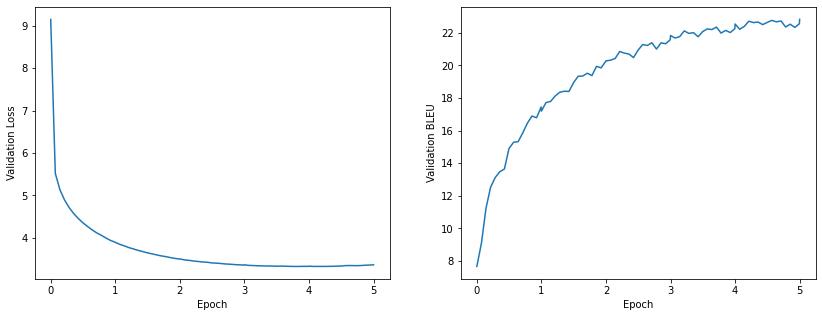

In [0]:
experiment_results = load_experiment_log(experiment_name=EXPERIMENT_NAME)
plot_single_learning_curve(experiment_results[0]['results'])

In [0]:
model_backup = copy.deepcopy(model)

In [0]:
summarize_results(experiment_results)[['model_name', 'best_val_loss', 'best_val_bleu', 'runtime', 
                                       'total_params', 'trainable_params', 'dt_created']]

,model_name,best_val_loss,best_val_bleu,runtime,total_params,trainable_params,dt_created
0,en-cz-rnn-without-attn-2020-05-14 18:54:16,3.324303,22.819461,166.42937,36992144,36992144,2020-05-14 21:40:45


In [0]:
# check performance on validation set 
val_loss, val_bleu, val_hyp_idxs, val_ref_idxs, val_source_idxs, val_hyp_tokens, val_ref_tokens, val_source_tokens,\
val_attn = evaluate(model=model, loader=loaders_full['dev'], 
                    src_id2token=vocab[SRC_LANG]['id2token'], targ_id2token=vocab[TARG_LANG]['id2token'])
print("Validation BLEU: {:.2f} | Validation Loss: {:.2f}".format(val_bleu, val_loss))

Validation BLEU: 22.82 | Validation Loss: 3.37


In [0]:
test_loss, test_bleu, test_hyp_idxs, test_ref_idxs, test_source_idxs, test_hyp_tokens, test_ref_tokens, test_source_tokens,\
test_attn = evaluate(model=model, loader=loaders_full['test'], 
                     src_id2token=vocab[SRC_LANG]['id2token'], targ_id2token=vocab[TARG_LANG]['id2token'])
print("Test BLEU: {:.2f} | Test Loss: {:.2f}".format(test_bleu, test_loss))

Test BLEU: 22.89 | Test Loss: 3.36


## Transfer learning on EN-PS

In [0]:
model = copy.deepcopy(model_backup)

In [361]:
# reload model
MODEL_NAME_TO_RELOAD = 'en-cz-rnn-without-attn-2020-05-14 18:54:16'
checkpoint = torch.load('/content/drive/My Drive/ds1012/MT/model_checkpoints/{}.pth.tar'.format(MODEL_NAME_TO_RELOAD), map_location=device)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [0]:
# reload from pickle for en-ps
SRC_LANG = 'en'
TARG_LANG = 'ps'
SRC_VOCAB_SIZE = 10000
TARG_VOCAB_SIZE = 10000

vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
vocab = pkl.load(open(vocab_filename, "rb"))

In [0]:
# Load data for en-ps
data = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, filter_long=False) # 449691
data_minibatch = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, sample_limit=BATCH_SIZE, filter_long=False) #64
data_minitrain = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, sample_limit=1000, filter_long=False) #1000

In [0]:
# create dataloaders 
## in the form 
loaders_full = create_dataloaders(data, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)
loaders_minibatch = create_dataloaders(data_minibatch, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)
loaders_minitrain = create_dataloaders(data_minitrain, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)

In [0]:
RESULTS_LOG = '/content/drive/My Drive/ds1012/MT/experiment_results/{}_{}_transfer_experiment_results_log.pkl'.format(SRC_LANG, TARG_LANG)

In [0]:
SRC_LANG = 'en'
TARG_LANG = 'ps'
SRC_VOCAB_SIZE = 10000 
TARG_VOCAB_SIZE = 10000
# model architecture params 
NETWORK_TYPE = 'rnn'
RNN_CELL_TYPE = 'gru'
NUM_LAYERS = 2 
ENC_HIDDEN_DIM = 512
DEC_HIDDEN_DIM = 2 * ENC_HIDDEN_DIM 
TEACHER_FORCING_RATIO = 1
CLIP_GRAD_MAX_NORM = 1
ENC_DROPOUT = 0 
DEC_DROPOUT = 0  
ATTENTION_TYPE = 'without'

# training params  
NUM_EPOCHS = 10
LR = 0.00015 
OPTIMIZER = 'Adam'
LAZY_TRAIN = False

# name the model and experiment 
if NETWORK_TYPE == 'rnn': 
    EXPERIMENT_NAME = '{}-{}-rnn-{}-attn'.format(SRC_LANG, TARG_LANG, ATTENTION_TYPE)
elif NETWORK_TYPE == 'cnn': 
    EXPERIMENT_NAME = '{}-cnn'.format(SRC_LANG)
MODEL_NAME = '{}-{}'.format(EXPERIMENT_NAME, datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

In [0]:
# store as dict to save to results later 
params = {'experiment_name': EXPERIMENT_NAME,'model_name': MODEL_NAME, 'src_lang': SRC_LANG, 'targ_lang': TARG_LANG, 
          'rnn_cell_type': RNN_CELL_TYPE, 'src_max_sentence_len': SRC_MAX_SENTENCE_LEN, 
          'targ_max_sentence_len': TARG_MAX_SENTENCE_LEN, 'src_vocab_size': SRC_VOCAB_SIZE, 
          'targ_vocab_size': TARG_VOCAB_SIZE, 'num_layers': NUM_LAYERS, 'enc_hidden_dim': ENC_HIDDEN_DIM, 
          'dec_hidden_dim': DEC_HIDDEN_DIM, 'teacher_forcing_ratio': TEACHER_FORCING_RATIO, 
          'clip_grad_max_norm': CLIP_GRAD_MAX_NORM, 'enc_dropout': ENC_DROPOUT, 'dec_dropout': DEC_DROPOUT, 
          'attention_type': ATTENTION_TYPE, 'batch_size': BATCH_SIZE, 'num_epochs': NUM_EPOCHS, 
          'learning_rate': LR, 'optimizer': OPTIMIZER, 'lazy_train': LAZY_TRAIN}

In [0]:
# freeze encoder
for p in model.encoder.parameters():
    p.requires_grad = False

In [0]:
encoder = model.encoder

# without attention 
decoder = DecoderRNN(dec_hidden_dim=DEC_HIDDEN_DIM, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS,
                        targ_vocab_size=TARG_VOCAB_SIZE, targ_max_sentence_len=TARG_MAX_SENTENCE_LEN)

model = EncoderDecoder(encoder, decoder, vocab[TARG_LANG]['token2id']).to(device)

In [0]:
model_ps, results_ps = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=paramsm, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

In [0]:
# not fix encoder
model_ps, results_ps = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

In [0]:
# only fix source embedding
# freeze encoder
for p in model.encoder.parameters():
    p.requires_grad = False
    break
model, results = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

In [0]:
# only fix encoder RNN
for i, p in enumerate(model.encoder.parameters()):
    if i==0:continue
    else:
      p.requires_grad = False
model, results = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

### Transfer on od

In [0]:
# reload from pickle for en-od
SRC_LANG = 'en'
TARG_LANG = 'od'
SRC_VOCAB_SIZE = 10000
TARG_VOCAB_SIZE = 10000

vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
vocab = pkl.load(open(vocab_filename, "rb"))

In [0]:
# Load data for en-od
data = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, filter_long=False) # 449691
data_minibatch = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, sample_limit=BATCH_SIZE, filter_long=False) #64
data_minitrain = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, sample_limit=1000, filter_long=False) #1000

In [0]:
# create dataloaders 
## in the form 
loaders_full = create_dataloaders(data, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)
loaders_minibatch = create_dataloaders(data_minibatch, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)
loaders_minitrain = create_dataloaders(data_minitrain, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)

In [0]:
RESULTS_LOG = '/content/drive/My Drive/ds1012/MT/experiment_results/{}_{}_transfer_experiment_results_log.pkl'.format(SRC_LANG, TARG_LANG)

In [0]:
SRC_LANG = 'en'
TARG_LANG = 'od'
SRC_VOCAB_SIZE = 10000 
TARG_VOCAB_SIZE = 10000
# model architecture params 
NETWORK_TYPE = 'rnn'
RNN_CELL_TYPE = 'gru'
NUM_LAYERS = 2 
ENC_HIDDEN_DIM = 512
DEC_HIDDEN_DIM = 2 * ENC_HIDDEN_DIM 
TEACHER_FORCING_RATIO = 1
CLIP_GRAD_MAX_NORM = 1
ENC_DROPOUT = 0 
DEC_DROPOUT = 0  
ATTENTION_TYPE = 'without'

# training params  
NUM_EPOCHS = 10
LR = 0.00015 
OPTIMIZER = 'Adam'
LAZY_TRAIN = False

# name the model and experiment 
if NETWORK_TYPE == 'rnn': 
    EXPERIMENT_NAME = '{}-{}-rnn-{}-attn'.format(SRC_LANG, TARG_LANG, ATTENTION_TYPE)
elif NETWORK_TYPE == 'cnn': 
    EXPERIMENT_NAME = '{}-cnn'.format(SRC_LANG)
MODEL_NAME = '{}-{}'.format(EXPERIMENT_NAME, datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

In [0]:
# store as dict to save to results later 
params = {'experiment_name': EXPERIMENT_NAME,'model_name': MODEL_NAME, 'src_lang': SRC_LANG, 'targ_lang': TARG_LANG, 
          'rnn_cell_type': RNN_CELL_TYPE, 'src_max_sentence_len': SRC_MAX_SENTENCE_LEN, 
          'targ_max_sentence_len': TARG_MAX_SENTENCE_LEN, 'src_vocab_size': SRC_VOCAB_SIZE, 
          'targ_vocab_size': 6246, 'num_layers': NUM_LAYERS, 'enc_hidden_dim': ENC_HIDDEN_DIM, 
          'dec_hidden_dim': DEC_HIDDEN_DIM, 'teacher_forcing_ratio': TEACHER_FORCING_RATIO, 
          'clip_grad_max_norm': CLIP_GRAD_MAX_NORM, 'enc_dropout': ENC_DROPOUT, 'dec_dropout': DEC_DROPOUT, 
          'attention_type': ATTENTION_TYPE, 'batch_size': BATCH_SIZE, 'num_epochs': NUM_EPOCHS, 
          'learning_rate': LR, 'optimizer': OPTIMIZER, 'lazy_train': LAZY_TRAIN}

In [0]:
# not fix
encoder = model.encoder

# without attention 
decoder = DecoderRNN(dec_hidden_dim=DEC_HIDDEN_DIM, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS,
                        targ_vocab_size=6246, targ_max_sentence_len=TARG_MAX_SENTENCE_LEN)

model = EncoderDecoder(encoder, decoder, vocab[TARG_LANG]['token2id']).to(device)

In [354]:
model_od, results_od = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

Epoch: 0.00, Train Loss: 0.00, Val Loss: 8.66, Train BLEU: 0.00, Val BLEU: 0.02, Minutes Elapsed: 0.01
Sampling from val predictions...
Source: The wife hath not power of her own body ,
Reference: ପତ ୍ ନ ୀ ର ତ ା' ନ ି
Model: <SOS> ଚ ବଡଲଲ ବଡଲଲ 50 ମଋତ ସହନଶ ସହନଶ ସହନଶ ବନଠ

Source: Thy shepherds slumber , O king of Assyria : thy
Reference: ହ େ ଅଶ ୂ ରର ର ା ଜ ା,
Model: <SOS> God କନହସଙ କନହସଙ ପସରସସମ 77 ଧକଲସରସସ ଧକଲସରସସ ଧକଲସରସସ ଧକଲସରସସ

Source: And the drinking was according to the law ; none
Reference: ଦ ୍ ର ା କ ୍ ଷ ା ରସ
Model: <SOS> ୃ ୃ ୍ ୍ ୍ ୍ ୍ ୍ ୍

Epoch: 1.00, Train Loss: 0.00, Val Loss: 3.47, Train BLEU: 0.00, Val BLEU: 12.01, Minutes Elapsed: 0.60
Sampling from val predictions...
Source: <UNK> <UNK> <UNK> <UNK> <UNK> <EOS> <PAD> <PAD> <PAD> <PAD>
Reference: ମତ ୍ ସ ୍ ୟ ଏବ ଂ ପଶ ୁ
Model: <SOS> ଯ ି ର ା ତ ୍ ୍ ତ ା

Source: Lo now , his strength is in his loins ,
Reference: ବ େ ହମ ୋେ ତର ଶର ୀ ର ର
Model: <SOS> ତ େ ଶ ୍ ତ ତ େ େ ର

Source: And we declare unto you glad tidings , how that
Reference: ଆମ

In [358]:
# freeze encoder
for p in model.encoder.parameters():
    p.requires_grad = False
encoder = model.encoder

# without attention 
decoder = DecoderRNN(dec_hidden_dim=DEC_HIDDEN_DIM, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS,
                        targ_vocab_size=6246, targ_max_sentence_len=TARG_MAX_SENTENCE_LEN)

model = EncoderDecoder(encoder, decoder, vocab[TARG_LANG]['token2id']).to(device)
model_od, results_od = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

Epoch: 0.00, Train Loss: 0.00, Val Loss: 8.66, Train BLEU: 0.00, Val BLEU: 0.03, Minutes Elapsed: 0.01
Sampling from val predictions...
Source: And the LORD spake unto Moses , saying , <EOS>
Reference: ଅନନ ୍ ତର ସଦ ା ପ ୍ ରଭ ୁ
Model: <SOS> ଶଗ େ େ େ େ ୍ େ େ େ

Source: <UNK> , <UNK> <UNK> , <UNK> , <UNK> - <UNK>
Reference: ବଙ ୍ <UNK> ା <UNK> , ବ ା ଣପ
Model: <SOS> ମତଇ ଆକ ଆକ ଟଆମ ଭଧ ଭଧ ଭଧ ଭଧ ଭଧ

Source: <UNK> <UNK> <UNK> <UNK> <EOS> <PAD> <PAD> <PAD> <PAD> <PAD>
Reference: ଇଲ େ କ ୍ ଟ ୍ ର ୋ ନ
Model: <SOS> ଥଲବ ଥଲବ ଲମକକ ଲମକକ ବବକ ବବକ ବବକ ବବକ ବବକ

Epoch: 1.00, Train Loss: 0.00, Val Loss: 3.50, Train BLEU: 0.00, Val BLEU: 10.75, Minutes Elapsed: 0.53
Sampling from val predictions...
Source: And Ephraim their father mourned many days , and his
Reference: ଇଫ ୍ ରଯ ି ମ , ଏତସର ଓ ଇଲ
Model: <SOS> ତ େ ଶ ୍ ତ ା ନ େ ବ

Source: Seeing that Abraham shall surely become a great and mighty
Reference: ଅବ ୍ ରହ ା ମଠ ା ର ୁ ଏକ
Model: <SOS> ତ େ ର ା ତ ୍ ତ େ େ

Source: They answered him , We be Abraham ' s seed
Reference:

In [362]:
# freeze embeddings
for i,p in enumerate(model.encoder.parameters()):
    p.requires_grad = False
    break
encoder = model.encoder

# without attention 
decoder = DecoderRNN(dec_hidden_dim=DEC_HIDDEN_DIM, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS,
                        targ_vocab_size=6246, targ_max_sentence_len=TARG_MAX_SENTENCE_LEN)

model = EncoderDecoder(encoder, decoder, vocab[TARG_LANG]['token2id']).to(device)
model_od, results_od = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

Epoch: 0.00, Train Loss: 0.00, Val Loss: 8.67, Train BLEU: 0.00, Val BLEU: 0.02, Minutes Elapsed: 0.01
Sampling from val predictions...
Source: Draw thee waters for the siege , fortify thy strong
Reference: ଅବର ୋ ଧ ସମୟ ନ ି ମନ ୍ ତ
Model: <SOS> ଓନନ । । । ଉଥଲ ଉଥଲ ମଫର ମଫର ମଫର

Source: Blessed are they which are persecuted for righteousness ' sake
Reference: ପରମ େ ଶ ୍ ବରଙ ୍ କ ଇଚ ୍
Model: <SOS> ନଆଣ ବହତ ବହତ ଲୟଲରସଗ ଦହ ଦହ ଦହ ଶକଟ ଶକଟ

Source: And the four and twenty elders , which sat before
Reference: ତ ା' ପର େ ଚବ ି ଶ ଜଣ ପ
Model: <SOS> ମତର େ େ େ େ ୍ ଚପକ େ ବନପଶକ

Epoch: 1.00, Train Loss: 0.00, Val Loss: 3.46, Train BLEU: 0.00, Val BLEU: 12.92, Minutes Elapsed: 0.58
Sampling from val predictions...
Source: He that heareth you heareth me ; and he that
Reference: " ଯ େ ତବ େେ ଳ େ କ ୌ
Model: <SOS> ତ େ େ ଉ ଁ ଳ େ ମ ୁ

Source: O LORD , correct me , but with judgment ;
Reference: ହ େ ସଦ ା ପ ୍ ରଭ ୁ, ଆମ
Model: <SOS> ତ େ ଦ ା ପ ୍ ରଭ ୁ ତ

Source: The LORD of hosts hath sworn by himself , saying
Reference: ସ 

In [363]:
# freeze rnn
for i,p in enumerate(model.encoder.parameters()):
    if i==0: continue
    else:p.requires_grad = False
encoder = model.encoder

# without attention 
decoder = DecoderRNN(dec_hidden_dim=DEC_HIDDEN_DIM, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS,
                        targ_vocab_size=6246, targ_max_sentence_len=TARG_MAX_SENTENCE_LEN)

model = EncoderDecoder(encoder, decoder, vocab[TARG_LANG]['token2id']).to(device)
model_od, results_od = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

Epoch: 0.00, Train Loss: 0.00, Val Loss: 8.67, Train BLEU: 0.00, Val BLEU: 0.03, Minutes Elapsed: 0.01
Sampling from val predictions...
Source: The pride of thine heart hath deceived thee , thou
Reference: ତ ୁ ମ ୍ ଭର ଗର ୍ ବ ତ
Model: <SOS> ଟନର ହରଣକ ୍ ୍ ଶ ରଣର ରଣର ଳୟର ଭଷ

Source: The LORD will not spare him , but then the
Reference: ସଦ ା ପ ୍ ରଭ ୁ ତ ା ହ
Model: <SOS> େ େ ୍ ୍ ଥରପ ପରମ ପରମ ପରମ ୍?

Source: <UNK> , <UNK> <UNK> ( <UNK> ) <EOS> <PAD> <PAD>
Reference: <UNK> . <UNK> କ ି. ମ ି. ( <UNK>
Model: <SOS> ନତକ ଅଦର ଅଦର ନବର ୋ- ୋ- ୋ- ୋ- ୋ-

Epoch: 1.00, Train Loss: 0.00, Val Loss: 3.56, Train BLEU: 0.00, Val BLEU: 10.30, Minutes Elapsed: 0.58
Sampling from val predictions...
Source: And a letter unto Asaph the keeper of the king
Reference: ର ା ଜ ା ଆସଫ ୍ ଙ ୍ କ
Model: <SOS> ତ େ ଜ ା ବ େ େ ବ କ

Source: Nevertheless we made our prayer unto our God , and
Reference: ମ ା ତ ୍ ର ଆମ ୍ ଭମ ା
Model: <SOS> ତ ି ତ େ ମ େ ୍ ଭ େ

Source: Thus shall he do in the most strong holds with
Reference: ସ େ ବ ି ଦ େ ଶ ୀ ଯ
Mo

In [371]:
# not freeze
encoder = model.encoder

# without attention 
decoder = DecoderRNN(dec_hidden_dim=DEC_HIDDEN_DIM, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS,
                        targ_vocab_size=6246, targ_max_sentence_len=TARG_MAX_SENTENCE_LEN)

model = EncoderDecoder(encoder, decoder, vocab[TARG_LANG]['token2id']).to(device)
model_od, results_od = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=False, save_to_log=False, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

Epoch: 0.00, Train Loss: 0.00, Val Loss: 8.68, Train BLEU: 0.00, Val BLEU: 0.10, Minutes Elapsed: 0.01
Sampling from val predictions...
Source: And turning the cities of Sodom and Gomorrha into ashes
Reference: ପରମ େ ଶ ୍ ବର ଦଣ ୍ ଡ ସ
Model: <SOS> ଣଯଠ ଣଯଠ ୍ ୍ ବର ୍ ୍ ଡମ ଡମ

Source: There are also <UNK> bodies , and bodies <UNK> :
Reference: ସ ୍ ବର ୍ ଗ ୀ ୟ ଶର ୀ
Model: <SOS> ଯସବ ପରମ େ, ୍ ୍ ୍ ଲମକକ ଗ ଗ

Source: <UNK> <UNK> <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Reference: ପ ୍ ରସ ି ଦ ୍ ଧ ବ ୍
Model: <SOS> ନଉଥ ମକଙ ମକଙ ରହର ଇବନ ଇବନ ଇବନ ଇବନ ଇବନ

Epoch: 1.00, Train Loss: 0.00, Val Loss: 3.57, Train BLEU: 0.00, Val BLEU: 10.58, Minutes Elapsed: 0.60
Sampling from val predictions...
Source: Then hear thou from heaven thy dwelling place , and
Reference: ତବ େେ ତ ୁ ମ ୍ ଭ େ ସ
Model: <SOS> ତ େ ପର େ ମ ୍ ଭ େ ତ

Source: The most <UNK> <UNK> of this <UNK> can be seen
Reference: ଏହ ି ସମୟର େ ଗଢ ି ଉଠ ି ଥ
Model: <SOS> ତ େ ପର ୍ ତ େ ର ା େ

Source: And if any man think that he knoweth any thing
Reference: କ 